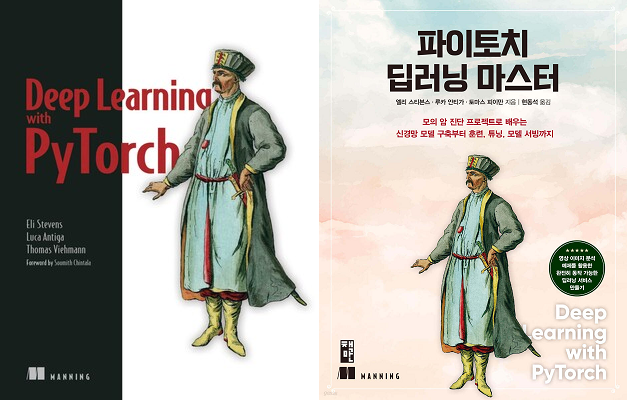

# **13 세그멘테이션을 활용한 의심 결절 탐색 Using Segmentation to Find Suspected Nodules**

Deep Learning with PyTorch  
13장 Using Segmentation to Find Suspected Nodules 발제 자료

Bowon Kwon  
2023년 12월 17일 생성,    
2024년 1월 7일 추가

#13.1 프로젝트에 두 번째 모델 추가하기



* **11장, 12장**에서 **4단계** 분류 수행했으나,
* **13장**에서는 다시 **2단계, 세그멘테이션**으로 돌아간다.
  * **세그멘테이션:** 결절일 가능성이 있는 지점 찾아 해당 복셀 표시하는 작업
  * **'분류기가 어디를 봐야할지'** 알려주는 단계
  * 13장 끝날 쯤 **픽셀 단위로 레이블**해주는 세그멘테이션 모델 아키텍처 얻는다
 * **14장**에서는 **3단계**, 13장 결과물 받아 이미지의 세그멘테이션 마스크 정보를 위치 어노테이션으로 변환하는 브릿지 다룰 것

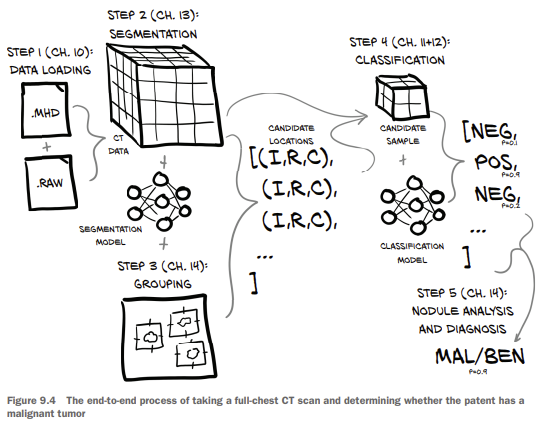

* **U-Net 모델** 세그멘테이션이 어떻게 동작하는지 먼저 확인할 것(13.3.1.)
* 13장 코드는 12장과 유사하나 기존 코드 베이스의 세 부분 바꿔야
 * **모델 업데이트(2A):** 12장 모델은 하나의 참/거짓 분류 출력하지만 새 모델은 이미지 전체 출력(13.4.)
    * 주: 분류보다 세분화된 이미지 인식
 * **데이터셋 변경(2B):** 결정 마스크 정보도 데이터셋에 포함, 세그멘테이션 훈련과 검증 위해 전체 이미지 단면과 2차원 크롭 모두 수집해야(13.5.)
   * 주: 세그멘테이션 작업에서 결절의 정확한 위치와 경계를 학습하고 식별하기 위해
 * **훈련 루프 수정(2C):** 새로운 종류의 손실값 도입하고 최적화(13.6.)
* 결과 확인(13.7.)


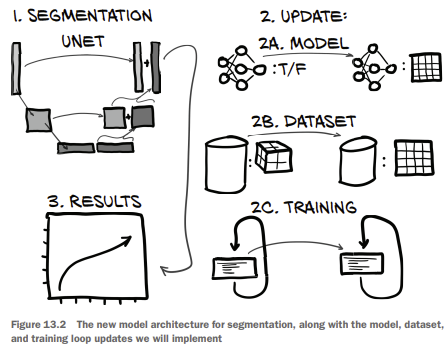

## (참고) 이미지 인식 분야 발전 과정

### 대체로 **Object Classification (12장)** → **Object Detection** → **Segmentation (13장)** 순으로 발전








## **1. Object Classification (객체 분류):**

 * 가장 기본적인 형태로, 이미지 안에 어떤 객체(예: 고양이, 개)가 있는지를 식별
 * 이미지 전체에 대한 단일 레이블 예측
 * 객체의 위치나 개수에 대한 정보는 제공하지 않음
 * 주요 연구
  * **AlexNet (2012):**
    * Alex Krizhevsky, **Ilya Sutskever**, **Geoffrey E. Hinton**, ["ImageNet Classification with Deep Convolutional Neural Networks"](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
    * 딥러닝이 이미지 분류 문제에 효과적으로 적용될 수 있음을 증명한 최초의 모델 중 하나
    * ImageNet 챌린지에서 놀라운 성과
  * **VGGNet (2014):**
    * Karen Simonyan, Andrew Zisserman, ["Very Deep Convolutional Networks for Large-Scale Image Recognition"](https://arxiv.org/abs/1409.1556)
    * 깊이 있는 컨볼루션 신경망 구조 사용하여 이미지 분류 성능 크게 향상
  * **ResNet (2015):**
    * Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, ["Deep Residual Learning for Image Recognition"](https://arxiv.org/abs/1512.03385)
    * 깊은 신경망을 효율적으로 학습할 수 있는 잔차 연결(residual connections) 도입
    * 깊은 네트워크에서 발생하는 소실된 기울기 문제를 해결하는 데 중요한 역할

## **2. Object Detection (객체 검출):**

 * 이미지 내에서 객체의 위치(일반적으로 **경계 상자(bounding box)** 형태로)와 해당 객체의 클래스 식별
 * 하나의 이미지에서 여러 객체 감지하고, 각 객체에 대해 별도의 레이블 붙임
 * 객체의 크기, 위치, 종류에 관한 정보 제공
 * 책에는 훈련에 많은 연산이 필요해서 배보다 배꼽이 더 큰 면도 있다고 서술
 * 주요 연구
  * **R-CNN (2014):**
    * Ross Girshick, Jeff Donahue, Trevor Darrell, Jitendra Malik, ["Rich feature hierarchies for accurate object detection and semantic segmentation"](https://arxiv.org/abs/1311.2524)
    * 지역 기반 컨볼루션 신경망(Region-based CNN)
    * 객체 검출 분야에서 큰 발전
  * **YOLO (You Only Look Once, 2016):**
    * Joseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadi, ["You Only Look Once: Unified, Real-Time Object Detection"](https://arxiv.org/abs/1506.02640)
    * 객체 검출을 실시간으로 수행할 수 있게 설계된 모델
    * 빠른 속도와 높은  제공
  * **SSD (Single Shot MultiBox Detector, 2016):**
    * Wei Liu, Dragomir Anguelov, Dumitru Erhan, Christian Szegedy, Scott Reed, Cheng-Yang Fu, Alexander C. Berg, ["SSD: Single Shot MultiBox Detector"](https://arxiv.org/abs/1512.02325)
    * 속도와 정확도 사이의 균형을 맞춘 다른 방식의 객체 검출 모델
  * 책에서 "여러 딥러닝 연구 논문 중 가장 재미있다"고 소개한 **YOLOv3**
    * Joseph Redmon, Ali Farhadi, ["YOLOv3: An Incremental Improvement"](https://arxiv.org/abs/1804.02767)
  * 2023년 1월에 나온 [**YOLOv8**](https://docs.ultralytics.com/ko/)이 최신 버전(링크에 YOLO 모델 발전 과정이 간단히 서술되어 있음)

## **3. Segmentation (세그멘테이션):**

 * 더 세밀한 접근 방식으로, 이미지 내의 개별 픽셀 레벨에서 객체 식별
 * **시맨틱 세그멘테이션**은 이미지 내 모든 픽셀을 분류, 같은 객체의 픽셀은 같은 레이블
 * **인스턴스 세그멘테이션**은 같은 클래스의 서로 다른 객체를 구별하여 각 객체에 고유한 레이블 부여
 * 객체의 정확한 형태와 경계를 파악할 수 있음
 * 주요 연구
  * **FCN (Fully Convolutional Network, 2015):**
    * Jonathan Long, Evan Shelhamer, Trevor Darrell, ["Fully Convolutional Networks for Semantic Segmentation"](https://arxiv.org/abs/1411.4038)
    * 이미지 세그멘테이션을 위한 최초의 전컨볼루션 네트워크
    * 픽셀 단위 예측 가능하게 함
  * 책에 나오는 **U-Net (2015):**
    * Olaf Ronneberger, Philipp Fischer, Thomas Brox, ["U-Net: Convolutional Networks for Biomedical Image Segmentation"](https://arxiv.org/abs/1505.04597)
    *  의료 영상 세그멘테이션에 특화된 모델
    * 효율적인 아키텍처와 데이터 활용으로 주목받음
  * **Mask R-CNN (2017):**
    * Kaiming He, Georgia Gkioxari, Piotr Dollár, Ross Girshick, ["Mask R-CNN"](https://arxiv.org/abs/1703.06870)
    * R-CNN을 확장하여 인스턴스 세그멘테이션 가능하게 함
    * 객체 검출과 픽셀 단위 세그멘테이션 동시에 수행할 수 있음

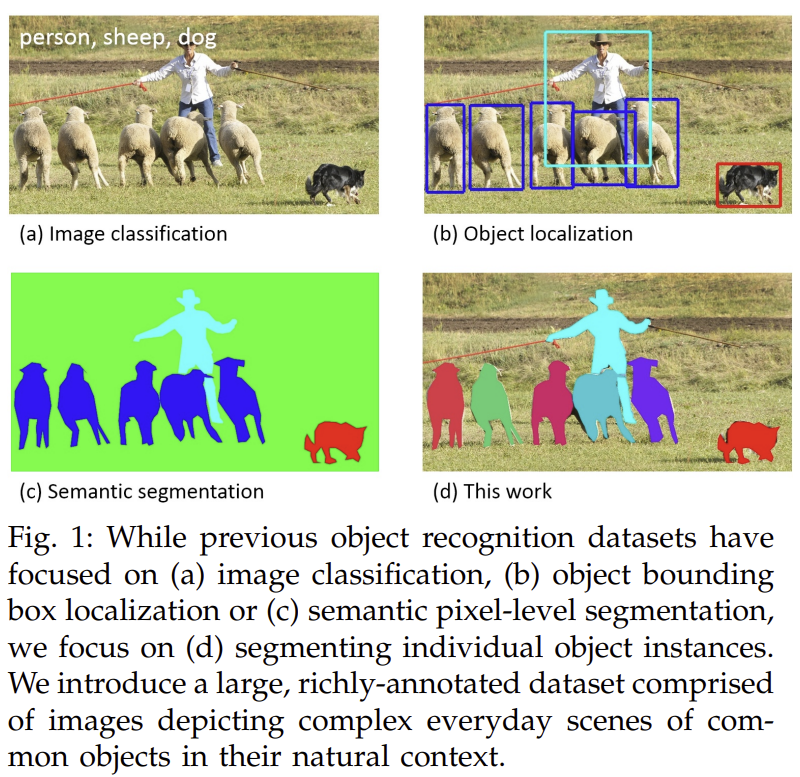

* 그림 출처: Tsung-Yi Lin, Michael Maire, Serge Belongie, Lubomir Bourdev, Ross Girshick, James Hays, Pietro Perona, Deva Ramanan, C. Lawrence Zitnick, Piotr Dollár, ["Microsoft COCO: Common Objects in Context"](https://arxiv.org/abs/1405.0312)
* 그림에서 (d)가 바로 **Instance Segmentation**

# 13.2 다양한 세그멘테이션 유형

## **1. Semantic Segmentation**
* 이미지 내의 **각 픽셀을 특정한 단일 클래스**(예: 곰, 개, 고양이)**에 할당**
* 하나의 픽셀이 둘 이상 클래스에 속할 수 없고 각 픽셀은 하나의 명확한 레이블 가짐("이 픽셀들은 고양이에 해당하는 부분이다.")
* 이미지를 **의미론적으로 일관된 영역**으로 나누어 **레이블 마스크**나 **히트맵 형식**으로 보여줌
* **객체의 경계를 정확히 구분**하는 데 유용
* 같은 클래스에 속하는 모든 객체는 동일한 레이블로 표시되므로, **개별 객체 간 구별은 하지 않음**
* 책의 프로젝트에서 세그멘테이션을 통해 만들 것은 **단순 이진 레이블**(**참:** 결절이 의심되는 후보 조직, **거짓:** 무관한 건강한 조직)
* 주요 논문
  * **FCN (2015)**
  * **DeepLab (2016)**
    * Liang-Chieh Chen, George Papandreou, Iasonas Kokkinos, Kevin Murphy, Alan L. Yuille, ["DeepLab: Semantic Image Segmentation with Deep Convolutional Nets, Atrous Convolution, and Fully Connected CRFs"](https://arxiv.org/abs/1606.00915)
    * atrous convolution과 CRF(Conditional Random Fields) 사용하여 세그멘테이션 정확도 높임

## **2. Instance Segmentation (인스턴스 세그멘테이션):**
* 시맨틱 세그멘테이션을 더 세분화하여, **같은 클래스 내에서도 각 개별 객체를 구별**
* 예를 들어, **이미지 내의 여러 사람 각각을 별도의 인스턴스로 식별하고 각각 다른 레이블 부여**
* 객체의 경계를 더 정확하게 파악하고, **각 객체의 위치와 형태를 더 상세하게 이해**하는 데 유용
* 주요 논문
 * **Multi-task Network Cascades (2016)**
   * Jifeng Dai, Kaiming He, Jian Sun, ["Instance-Aware Semantic Segmentation via Multi-task Network Cascades"](https://ieeexplore.ieee.org/document/7780712/authors#authors)
 * **Mask R-CNN (2017)**

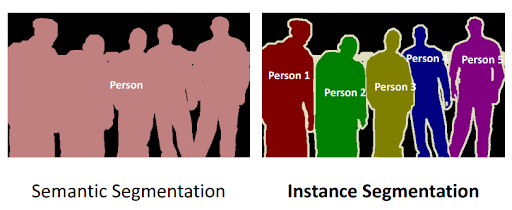

* 그림 출처: https://www.folio3.ai/blog/semantic-segmentation-vs-instance-segmentation/

# 13.3 시맨틱 세그멘테이션: 픽셀 단위 분류

**주:** object detection이나 instance segmentation은 구현이 매우 어렵다 하며, 우리는 **semantic segmentation**으로 결절(nodule) 위치만 파악

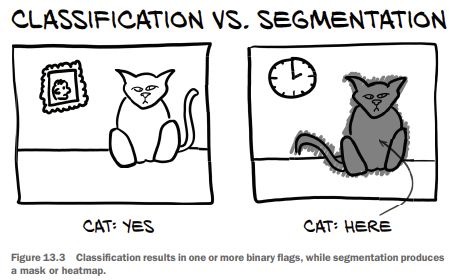

* **분류 모델(고양이가 있다/없다)**과 **세그멘테이션 모델(고양이가 ...에 있다)**은 다른 과제를 수행

## **CNN 복습**

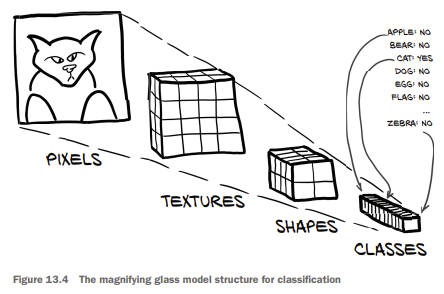

**다운샘플링**: 이미지 해상도 줄이는 과정으로, 이미지에서 중요한 특성 추출할 수 있음

**1. 픽셀(Pixels):**
* 이미지의 가장 기본적인 단위
* 각 픽셀에는 색상과 밝기 정보가 담겨 있음

**2. 텍스처(Textures):**
* 다운샘플링 통해 픽셀들의 집합에서 텍스처를 추출할 수 있음
* 텍스처는 픽셀들의 패턴이나 구조를 나타내며, 이미지의 중간 수준 특성을 형성

**3. 형태(Shapes):**
* 더 나아가 형태와 같은 더 높은 수준의 추상화된 특성을 추출할 수 있음
* 이는 객체의 외곽선이나 윤곽을 포착

**4. 클래스(Classes):**
* 마지막으로, 이러한 특성들을 사용하여 이미지를 분류할 수 있음
* 고양이!

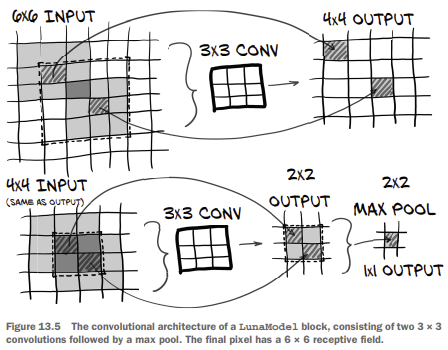

위 그림에서 6x6 입력이 3회 다운샘플링을 거쳐 1x1 출력을 생성하였는바, 최종 픽셀은 6x6의 **수용 필드(receptive field)** 가진다.

**수용 필드(receptive field):** CNN에서 특정 레이어의 한 뉴런이 입력 데이터의 어느 범위에 영향받는지를 나타내는 용어로, 해당 뉴런의 **"시야"**라고 볼 수 있다. **초기 레이어**에 있는 뉴런의 수용 필드는 일반적으로 작아서 입력 이미지의 작은 영역만 "보게" 되고, **깊은 레이어**로 갈수록 연속적인 컨볼루션과 풀링 레이어를 통해 수용 필드가 확장되어 뉴런이 더 큰 영역의 정보를 함축한다.

## **세그멘테이션**

출력을 입력과 같은 크기로 만들려면 다른 아키텍처 필요
* 적당한 패딩이 주어지면 출력의 크기 자체는 같게 만들 수 있겠지만, (주: 픽셀당) 수용 필드는 매우 제한될 것(주: 정보가 없는 픽셀을 인위적으로 만들어 채워 넣으므로) → **∴ '업샘플링' 기법 사용해야**
* **패딩:** CNN에서는 filter와 stride 작용으로 feature map이 입력 데이터보다 작아지는데, 입력 데이터 바깥쪽에 픽셀을 채워 넣는 패딩으로 출력 데이터가 줄어드는 것을 방지
* 아래 그림 출처: https://www.geeksforgeeks.org/cnn-introduction-to-padding/

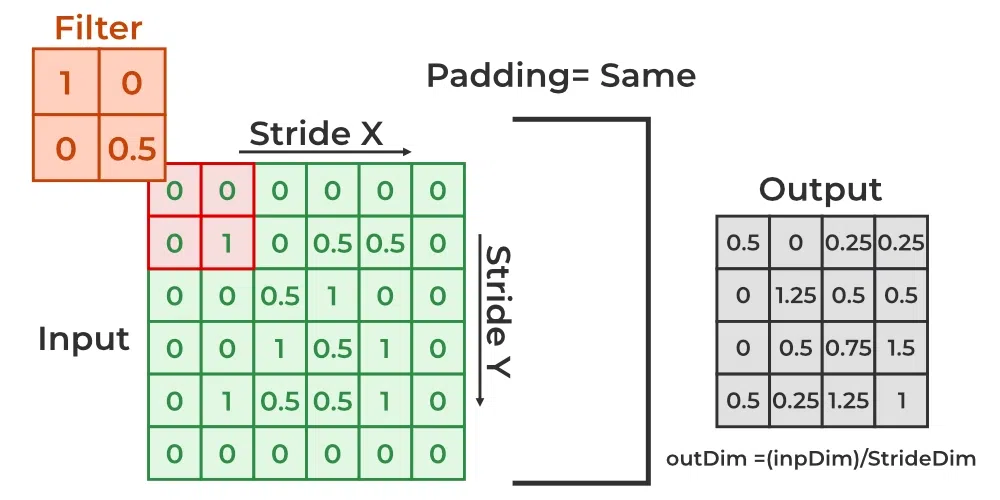

CNN 출력 데이터 계산 공식

출처: https://medium.com/syncedreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-42f33d4378e0

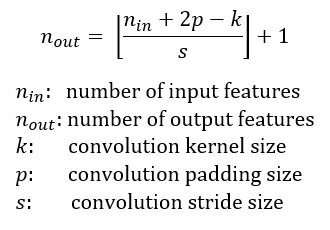

**(Note)** **3x3 컨볼루션**의 경우, 단순히 쌓인 컨볼루션 모델의 **수용 필드 사이즈**는 컨볼루션 층 수를 **L**이라 할 때 **2*L+1**이다.

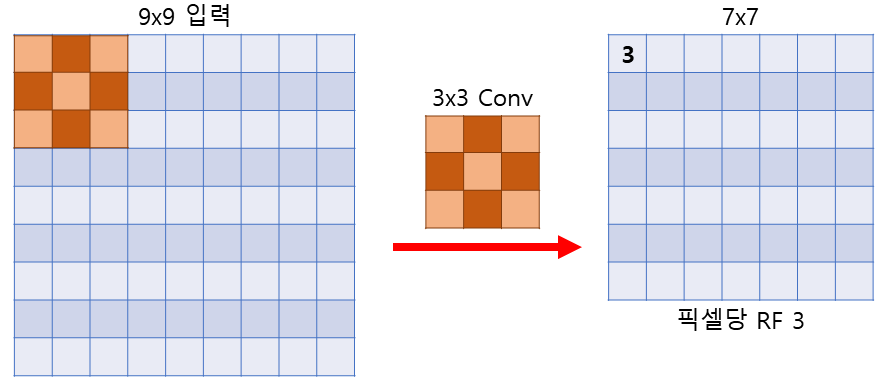

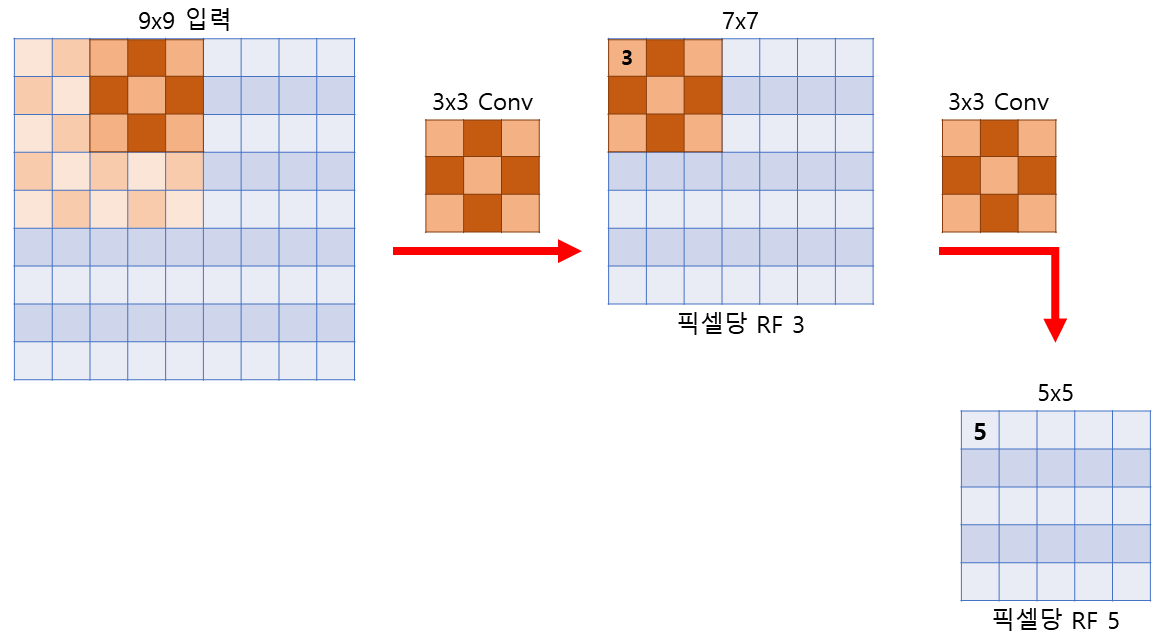

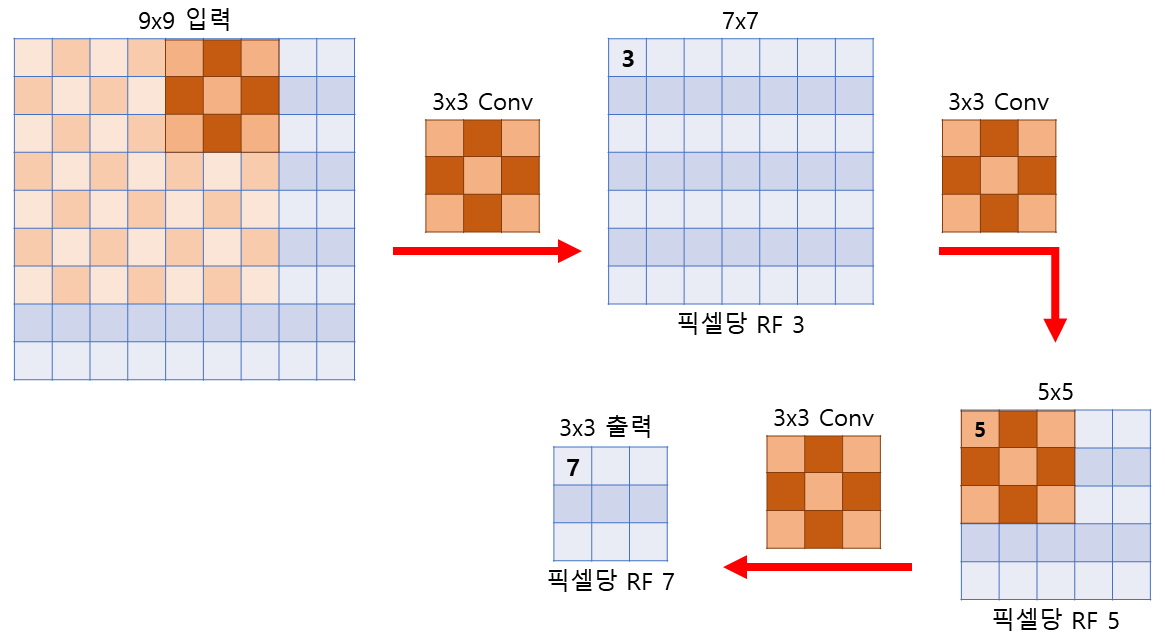

4개의 3x3 컨볼루션 층은 출력 픽셀당 9x9 수용 필드 가진다.

**문제** 두 번째와 세 번째 컨볼로순 사이와 끝에 2x2 맥스 풀링을 넣으면 수용 필드 값은...?

 * **(구조)** A → conv1 → B → conv2, max pool1 → C → conv3 → D → conv4, max pool2 → E

 * **(역산)** E의 픽셀 → (max pool2) 2x2 → (conv4) 4x4 → (conv3) 6x6 → (max pool1) 12x12 → (conv2) 14x14 → (conv1) **16x16**

**업샘플링:** 주어진 해상도의 이미지를 더 높은 해상도 이미지로 변환하는 기술
 * 각 입력 픽셀을 원래 픽셀과 같은 값 가지는 NxN 픽셀로 대체하는 것이 가장 간단한 형태
 * **선형 보간(linear interpolation):**
   * 주어진 점들 사이의 값을 추정하는 과정으로, 이웃하는 픽셀의 값들을 가중 평균하여 새로운 픽셀 값 결정
   * 부드러운 이미지 확대 위해 사용, 픽셀 간 색상 전환을 자연스럽게 만든다
 * **학습된 역합성곱(learned deconvolution):**
   * **전치 합성곱(transposed convolution)**이라고도 하고, 업샘플링을 위해 사용되는 신경망 레이어
   * 이 레이어는 학습 가능한 가중치를 가지고 있어, 업샘플링하는 동안 데이터에 특화된 패턴을 학습할 수 있음
   * 선형 보간보다 더 복잡한 구조와 패턴을 복원할 수 있고, 세그멘테이션과 같이 더 세밀한 디테일이 요구되는 작업에 자주 사용

## **13.3.1. 유넷 아키텍처**

* **유넷 아키텍처**
  * **의료 영상 세그멘테이션**을 위해 특별히 고안된 신경망으로, 인코더-디코더 구조를 따르고 알파벳 U와 비슷하게 생겼음
  * **인코더** 부분은 일련의 컨볼루션과 풀링 연산을 통해 이미지에서 특징 추출하고, 각 단계의 특징 맵 저장
  * **디코더** 부분은 특징 맵을 업샘플링하고, 인코더 부분에서 저장된 특징 맵과 결합하여 원본 이미지 크기의 세그멘테이션 맵을 생성
  * 인코더 디코더 사이의 **스킵 연결(skip connection)**로 **인코더의 특징 맵**을 **디코더의 해당 레벨**과 직접 연결하여 세부 정보 보존(**copy & crop**)
  * 이 과정은 세밀한 위치 정보를 유지하면서 객체의 정확한 형태를 복원하는 데 도움

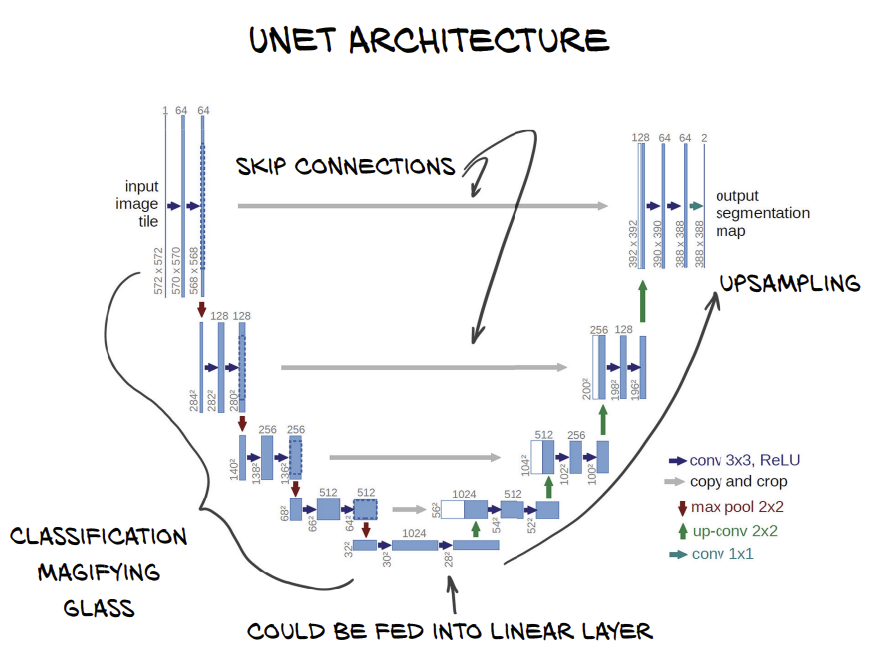

* 그림 설명
  * 정사각형 이미지 입력 (572x572)
  * 연속적인 3x3 컨볼루션 및 ReLU 활성화 함수 층 통과, **패딩 없이 수행하므로 conv 층 통과할 때마다 -2** (572 → 570 → 568)
  * 첫 번째 컨볼루션 층에서는 1개 채널(예: 흑백 이미지) 가진 입력이 64개 채널로 확장
  * **max pooling 층 통과하면 1/2** (568 → 284)
  * 인코더 단계에서 이러한 과정이 반복되면서 픽셀 크기 점점 축소
  * 디코더 단계에서 업샘플링 통해 픽셀 크기 다시 증가(**up conv 통과하면 x2**, 52 → 104, 196 → 392)
  * 신경망 헤드에 위치한 제일 오른쪽 마지막 1x1 conv 층은 마지막 업샘플링 단계에서 사용된 필터 수를 선형 조합하여 필요한 출력 클래스 수로 변환[논문에서는 **이진 분류**하므로 2, 책에서는 각 픽셀이 결절 일부일 확률 출력하므로 1]

* 유넷의 의의
  * 초기 신경망에도 전체 conv 네트워크의 **제한된 수용 필드 크기** 해결하기 위한 이런 U자 모양 있었음
  * 이미지 분류 네트워크의 특정 부분을 복사하고, 반전시키고, 초점 부분을 확장함으로써 세부적인 디테일에서 넓은 수용 필드를 거쳐 다시 세부적인 디테일로 돌아가는 대칭적 모델
  * 그러나 다운샘플링 과정에서 공간 정보 손실하기 때문에 수렴 문제 있었음
  * 유넷은 **스킵 연결(skip connection)** 추가하여 다운샘플링 경로를 따라 입력을 직접 업샘플링 레이어로 보내는 방식을 도입하였고(그림에서 **흰색 직사각형 부분**), 높은 수준의 세부 정보 유지하게 하는 주요한 혁신
  * 마지막 세부 레이어는 **'(다운샘플링, 업샘플링을 거친) 더 넓은 컨텍스트 정보'**와 **'처음의 전체 해상도 레이어부터 온 세부 데이터'**를 모두 활용할 수 있게 됨

**(참고)**
* **U-Net과 ResNet 비교**
  * U-Net이 2015. 5. 18., ResNet이 2015. 12. 10. arxiv 등록
  * 공통점:
   * 두 아키텍처 모두 깊은 층을 통해 복잡한 특징을 학습
   * **스킵 연결** 사용하여 정보를 네트워크 깊은 층으로 전달하고 정보 손실 줄임
  * 차이점:
   * U-Net은 이미지 세그멘테이션에 특화되어 있고, 대칭적인 구조와 스킵 연결을 통해 이미지의 픽셀 수준 분류를 가능하게 함
   * ResNet은 이미지 분류에 최적화, **잔차 연결(residual connections)** 사용해 깊은 네트워크를 효과적으로 학습
   * U-Net의 스킵 연결은 인코더에서 디코더로 특징 맵을 직접 전달(copy & crop)하는 반면, ResNet의 잔차 연결은 더 깊은 층으로 정보를 전달하기 위해 **항등 매핑(identity mapping)**을 사용(잔차 블록 입력을 해당 블록 출력에 직접 더하여, 입력 데이터는 변형 없이 다음 레이어로 전달)

**Residual Learning**

그림 출처: https://arxiv.org/abs/1512.03385

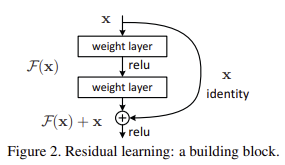



# 13.4 세그멘테이션을 위한 모델 업데이트(2A)

저자들이 수정한 **util/unet.py 모델**

In [ ]:
# util.unet.py
import torch
from torch import nn
import torch.nn.functional as F

# U-Net 모델 정의
class UNet(nn.Module):
    # U-Net 모델 초기화(다양한 파라미터 설정)
    def __init__(self, in_channels=1, n_classes=2, depth=5, wf=6, padding=False,
                 batch_norm=False, up_mode='upconv'):
        super(UNet, self).__init__()
        assert up_mode in ('upconv', 'upsample') # 업샘플링 모드('upcov' or 'upsample') 확인
        self.padding = padding                   # 패딩 사용 여부 설정
        self.depth = depth                       # U-Net 깊이(레이어 수) 설정
        prev_channels = in_channels              # 이전 채널 수 초기화(입력 채널 수)
        self.down_path = nn.ModuleList()         # 인코더(다운샘플링) 경로를 위한 모듈 리스튼 초기화

        # 인코더(다운샘플링) 컨볼루션 블록 생성
        for i in range(depth):                  # 주어진 네트워크 깊이(i)만큼 반복
            self.down_path.append(UNetConvBlock(prev_channels, 2**(wf+i),
                                                padding, batch_norm)) # 이전 레이어 채널 수(처음에는 입력 채널 수로 시작), 새로운 레이어의 출력 채널 수, padding, batch_norm
            prev_channels = 2**(wf+i)            # 다음 반복을 위해 이전 채널 수 업데이트
                                                 # 기본 필터 수 wf(width factor)는 네트워크 첫 번째 레이어에서의 필터(채널) 수 결정하고, 깊이(i) 증가에 따라 필터 수 지수적으로 증가
                                                 # 모델 깊어질수록 더 많은 피처 학습할 수 있게 해줌

        self.up_path = nn.ModuleList()           # 디코더(업샘플링) 경로를 위한 모듈 리스트 초기화

        # 디코더(업샘플링) 컨볼루션 블록 생성
        for i in reversed(range(depth - 1)):     # 인코더 층 수보다 하나 적은 횟수만큼 역순으로 반복
            self.up_path.append(UNetUpBlock(prev_channels, 2**(wf+i), up_mode,
                                            padding, batch_norm))
            prev_channels = 2**(wf+i)

        # 최종 출력 레이어(1x1 컨볼루션) 생성
        self.last = nn.Conv2d(prev_channels, n_classes, kernel_size=1) # 마지막 업샘플링 레이어 출력 채널 수, 최종 클래스 수=2

    # 순전파
    def forward(self, x):
        blocks = []       # 'blocks = []'는 인코더에서의 중간 출력을 저장하기 위한 리스트
        # 인코더 부분 통과
        for i, down in enumerate(self.down_path):
            x = down(x)                         # UNetConvBlock 클래스의 인스턴스인 down의 forward(x) 메서드 호출
            if i != len(self.down_path)-1:      # 마지막 인코더 블록 제외한 모든 블록에 대해 실행(마지막 블록 출력은 다운샘플링되지 않도록 하기 위함)
                blocks.append(x)                # 현재 블록 출력을 blocks 리스트에 추가(나중에 디코더에서 스킵 연결에 사용)
                x = F.avg_pool2d(x, 2)          # 평균 풀링으로 다운샘플링하여 다음 레이어 입력으로 사용
        # 디코더 부분 통과
        for i, up in enumerate(self.up_path):   # UNetUpBlock 클래스의 인스턴스인 up의 forward(x, blocks[-i-1]) 메서드를 호출
            x = up(x, blocks[-i-1])             # 업샘플링된 결과와 스킵 연결 적용
                                                # 업샘플링 블록에 현재 입력 'x'와 인코더에서 해당 레벨의 출력 'blocks[-i-1]' 전달
                                                # 여기서 '-i-1' 인덱스는 현재 디코더 레벨에 해당하는 인코더 레벨의 피처 맵 가져오기 위해 사용(역순으로 접근)
                                                # 업샘플링된 피처 맵 'x'와 다운샘플링에서 가져온 피처 맵 'blocks[-i-1]'의 스킵 연결

        return self.last(x)                     # 최종 출력 반환

# 인코더(다운샘플링) 컨볼루션 블록 정의
class UNetConvBlock(nn.Module):
    def __init__(self, in_size, out_size, padding, batch_norm):     # 블록 초기화
        super(UNetConvBlock, self).__init__()
        block = []
        # 컨볼루션 블록 생성
        block.append(nn.Conv2d(in_size, out_size, kernel_size=3,
                               padding=int(padding)))
        block.append(nn.ReLU())                 # 활성화 함수
        # block.append(nn.LeakyReLU())
        if batch_norm:                          # 배치 정규화
            block.append(nn.BatchNorm2d(out_size))

        block.append(nn.Conv2d(out_size, out_size, kernel_size=3,
                               padding=int(padding)))
        block.append(nn.ReLU())
        # block.append(nn.LeakyReLU())
        if batch_norm:
            block.append(nn.BatchNorm2d(out_size))

        self.block = nn.Sequential(*block)      # 시퀀스 블록 생성
    # 순전파
    def forward(self, x):
        out = self.block(x)
        return out

# 디코더(업샘플링) 컨볼루션 블록 정의
class UNetUpBlock(nn.Module):
    def __init__(self, in_size, out_size, up_mode, padding, batch_norm):    # 블록 초기화
        super(UNetUpBlock, self).__init__()
        # 업샘플링 모드 따라 다른 업샘플링 기법 사용
        if up_mode == 'upconv':                # 전치 컨볼루션 사용한 업샘플링
            self.up = nn.ConvTranspose2d(in_size, out_size, kernel_size=2,
                                         stride=2)
        elif up_mode == 'upsample':            # bilinear 업샘플링 후 1x1 컨볼루션(kernel_size=1) 사용
            self.up = nn.Sequential(nn.Upsample(mode='bilinear', scale_factor=2),
                                    nn.Conv2d(in_size, out_size, kernel_size=1))

        # 컨볼루션 블록 초기화
        self.conv_block = UNetConvBlock(in_size, out_size, padding, batch_norm)

    # 중앙을 자르는 함수 정의
    def center_crop(self, layer, target_size):
        _, _, layer_height, layer_width = layer.size()    # layer.size() 함수로 반환되는 텐서의 모든 차원의 크기 중에서, 첫 번째(배치 크기), 두 번째(채널 수) 무시하고, 입력 레이어 높이(세 번째), 너비(네 번째) 추출
        diff_y = (layer_height - target_size[0]) // 2     # 자를 영역 시작점 계산 '//'는 정수 나눗셈
        diff_x = (layer_width - target_size[1]) // 2
        return layer[:, :, diff_y:(diff_y + target_size[0]), diff_x:(diff_x + target_size[1])]  # (텐서의 모든 배치와 채널에 대하여,) 계산된 시작점부터 'target_size'만큼 크기로 중앙 부분 잘라 반환

    # 순전파 함수
    def forward(self, x, bridge):             # 앞에서 본 'blocks[-i-1]'가 'bridge' 역할
        up = self.up(x)                       # 입력 x에 업샘플링 적용
        crop1 = self.center_crop(bridge, up.shape[2:])  # bridge(다운샘플링 블록에서 온 스킵 연결)를 업샘플링 된 크기(세 번째 차원인 높이와 네 번째 차원인 너비)에 맞게 자름
        out = torch.cat([up, crop1], 1)       # 업샘플링 된 출력 'up'과 자른 bridge 'crop1'를 채널 차원(dim=1) 기준으로 결합
        out = self.conv_block(out)            # 결합된 결과에 추가로 컨볼루션 블록 적용하여 최종 출력 생성

        return out

* **upconv (전치 컨볼루션, Transpose Convolution):**
  * 입력 피처 맵의 각 픽셀 주위에 패딩(보통 0)을 추가하고, 일반 컨볼루션을 수행하는 것과 유사한 방식으로 작동
  * 결과적으로 출력 피처 맵의 크기가 확장
  * 전치 컨볼루션은 종종 이미지의 해상도를 늘리는 데 사용되며, 픽셀 간의 관계를 학습하는 데 유용

* **upsample (업샘플링 후 컨볼루션):**
  * 먼저 입력 피처 맵을 업샘플링(예: bilinear 업샘플링)하여 크기를 확장한 후, 일반 컨볼루션(보통 1x1 컨볼루션) 적용
  * 업샘플링은 단순히 피처 맵의 크기를 늘리는 것이고, 이후의 컨볼루션은 확장된 피처 맵에서 새로운 피처를 추출
  * 종종 계산 비용이 더 낮으며, 전치 컨볼루션에서 발생할 수 있는 체커보드 아티팩트(불규칙한 패턴)를 방지할 수 있음

## **13.4.1. 기성품 모델을 프로젝트에 적용하기**

* **제거 연구(ablation study)**
  * 옮긴이 추천 글 https://cumulu-s.tistory.com/8
* 바꿀 부분
  1. 입력을 **배치 정규화** 통과시켜 직접 정규화할 필요가 없음
    * 개별 배치에 대한 정규화 통계(평균, 표준편차)도 얻음
    * 배치가 무언가를 볼 수 없을 때 CT 크롭이 더 강하게 스케일되도록 함
    * U-Net 모델은 기본적으로 2차원 세그멘테이션 모델로 설계되었으므로, nn.BatchNorm2d 사용
      * 3차원 데이터(예: 의료 영상에서 CT나 MRI 스캔) 사용하려면 nn.BatchNorm3d를 사용할 수 있고, 이는 3차원 볼륨에 대해 배치 정규화 적용하고, 높이, 너비, 깊이(즉, Z 방향의 슬라이스)에 대해 정규화 수행
      * 그러나 3차원 배치 정규화는 **메모리 사용량**이 훨씬 더 많고 계산 비용이 높음, 메모리 사용 줄이기 위해 CT 스캔을 더 잘게 잘랐다가 합치는 과정 거쳐야 할 수도
      * CT 스캔에서 각 슬라이스 간 거리(즉 Z축 방향의 픽셀 간격)가 슬라이스 내부(즉 XY 평면)의 픽셀 간격보다 훨씬 크므로, 특정한 병변이나 구조(예: 결절)가 여러 슬라이스에 걸쳐 나타날 확률이 낮아짐. 즉, 3차원 데이터의 각 슬라이스는 다른 슬라이스와 비교했을 때 상대적으로 독립적인 정보를 포함할 가능성이 높음
      * 3차원 접근 방식은 목적에 덜 부합
    * 책에서는 3차원 데이터를 단면으로 나누고 2D 세그멘테이션 방식으로 적응시키는 것을 선택
  2. 출력값에 제한이 없으므로 **nn.Sigmoid** 통과시켜 **출력 범위를 [0, 1] 범위로 제한**
  3. 모델 전체 깊이와 필터 수 줄여 단순화
  4. 출력은 **단일 채널(해당 픽셀이 결절의 일부일 확률)**

In [ ]:
# model.py
import math
import random
from collections import namedtuple

import torch
from torch import nn as nn
import torch.nn.functional as F

from util.logconf import logging
from util.unet import UNet

log = logging.getLogger(__name__)
# log.setLevel(logging.WARN)
# log.setLevel(logging.INFO)
log.setLevel(logging.DEBUG)

class UNetWrapper(nn.Module):                 # UNetWrapper 클래스는, 입력 채널 수 정보 받아, nn.BatchNorm2d로 배치 정규화, U-Net 모델을 초기화하며, nn.Sigmoid를 마지막 레이어로 사용
    # 초기화
    def __init__(self, **kwargs):
        super().__init__()
        self.input_batchnorm = nn.BatchNorm2d(kwargs['in_channels']) # 입력 데이터에 대한 배치 정규화 레이어 생성,
                                              # kwargs는 키워드 인자(keyword arguments)의 dictionary로 이를 통해 개발자는 함수 호출할 때 어떤 키워드 인자들이 전달되었는지 확인할 수
                                              # 특히 API나 라이브러리 등에서 함수나 클래스의 인자들이 미리 정해지지 않았거나 사용자에 의해 확장될 가능성이 있을 때 유용
                                              # kwargs['in_channels']는 그 dictionary에서 'in_channels'에 해당하는 값, 즉 U-Net 모델에 입력되는 채널 수(흑백 1, 컬러 3)
        self.unet = UNet(**kwargs)            # U-Net 모델 초기화, **kwargs는 키워드 인자를 dictionary 형태로 받아 U-Net 생성자에 전달
        self.final = nn.Sigmoid()             # 모델의 최종 출력을 시그모이드 활성화 함수 통과시켜 확률로 변환

        self._init_weights()                  # 가중치 초기화 메소드 호출

    # 가중치 초기화
    def _init_weights(self):                  # 모델의 가중치 초기화
        init_set = {                          # 가중치 초기화가 필요한 층의 유형을 저장하는 set
            nn.Conv2d,
            nn.Conv3d,
            nn.ConvTranspose2d,
            nn.ConvTranspose3d,
            nn.Linear,
        }
        for m in self.modules():              # 현재 모델(UNetWrapper)의 모든 서브 모듈 반복
            if type(m) in init_set:           # 현재 모듈 m의 유형이 초기화 대상인지 확인
                nn.init.kaiming_normal_(      # He 초기화 사용하여 가중치 초기화, ReLU와 함께 사용될 때 좋은 성능 내는 방법
                    m.weight.data, mode='fan_out', nonlinearity='relu', a=0   # 가중치를 출력 노드 수(fan_out) 기준으로 스케일
                )
                if m.bias is not None:        # 편향이 있는 층에 대해 추가로 초기화(m.bias는 해당 층의 편향 매개변수, None이 아니라는 것은 편향 매개변수가 있고 초기화 필요함을 의미)
                    fan_in, fan_out = \
                        nn.init._calculate_fan_in_and_fan_out(m.weight.data) # 주어진 가중치 텐서 기반으로 해당 층의 fan_in[층으로 들어오는 가중치(연결) 수], fan_out[층에서 나가는 가중치(연결) 수]
                    bound = 1 / math.sqrt(fan_out)          # 편향 초기화하기 위한 범위 설정,
                                                            # fan_out의 역수 제곱근으로 계산, He 초기화 방식에서 사용되는 공식의 일부로, 가중치 초기화 시 가중치 값이 아래 범위에서 랜덤하게 선택되게 함
                    nn.init.normal_(m.bias, -bound, bound)  # 편향을 정규분포로 초기화, 평균은 0, 표준편차는 - bound에서 bound 사이에서 설정

        # nn.init.constant_(self.unet.last.bias, -4)        # 주어진 텐서를 특정한 상수 -4, 4로 채워 초기화(특정 층의 편향을 초기 상태에서 확정된 값으로 설정할 때 사용)
        # nn.init.constant_(self.unet.last.bias, 4)

    # 순전파(저자는 문제가 거의 일어나지 않긴 하겠지만 읽기 좋으라고 nn.Sequential 안 썼다고 함, 470쪽 각주 7)
    def forward(self, input_batch):
        bn_output = self.input_batchnorm(input_batch) # 입력 배치 정규화 적용
        un_output = self.unet(bn_output)              # UNet 모델 통과
        fn_output = self.final(un_output)             # 최종 출력 시그모이드 함수 통과
        return fn_output                              # 최종 출력은 각 픽셀이 결절 일부일 확률 나타내는 확률 맵

class SegmentationAugmentation(nn.Module):
    def __init__(
            self, flip=None, offset=None, scale=None, rotate=None, noise=None
    ):
        super().__init__()

        self.flip = flip                      # 뒤집기 증강
        self.offset = offset                  # 오프셋(이동) 증강
        self.scale = scale                    # 스케일링 증강
        self.rotate = rotate                  # 회전 증강
        self.noise = noise                    # 노이즈 증강

    def forward(self, input_g, label_g):
        transform_t = self._build2dTransformMatrix()  # 2D 변환 행렬 생성
        transform_t = transform_t.expand(input_g.shape[0], -1, -1)
        transform_t = transform_t.to(input_g.device, torch.float32)
        affine_t = F.affine_grid(transform_t[:,:2],
                input_g.size(), align_corners=False)

        augmented_input_g = F.grid_sample(input_g,
                affine_t, padding_mode='border',
                align_corners=False)
        augmented_label_g = F.grid_sample(label_g.to(torch.float32),
                affine_t, padding_mode='border',
                align_corners=False)

        if self.noise:
            noise_t = torch.randn_like(augmented_input_g)
            noise_t *= self.noise

            augmented_input_g += noise_t

        return augmented_input_g, augmented_label_g > 0.5

    def _build2dTransformMatrix(self):
        transform_t = torch.eye(3)          # 3x3 단위 행렬 생성

        for i in range(2):
            if self.flip:
                if random.random() > 0.5:
                    transform_t[i,i] *= -1  # 뒤집기 적용

            if self.offset:
                offset_float = self.offset
                random_float = (random.random() * 2 - 1)
                transform_t[2,i] = offset_float * random_float        # 오프셋 적용

            if self.scale:
                scale_float = self.scale
                random_float = (random.random() * 2 - 1)
                transform_t[i,i] *= 1.0 + scale_float * random_float  # 스케일링 적용

        if self.rotate:
            angle_rad = random.random() * math.pi * 2     # 회전 각도
            s = math.sin(angle_rad)
            c = math.cos(angle_rad)

            rotation_t = torch.tensor([
                [c, -s, 0],
                [s, c, 0],
                [0, 0, 1]])

            transform_t @= rotation_t     # 회전 적용

        return transform_t

# 13.5 세그멘테이션을 위한 데이터셋 업데이트(2B)-1

## 13.5.1 매우 제한된 입력 크기를 갖는 유넷



* 컨볼루션과 다운샘플링 사이의 상호작용과 관련한 문제
  * 유넷 논문은 572x572 이미지 패치 사용했고, 출력 맵 크기는 388x388로 제한(주: 고정?)
  * 512x512인 우리 CT 단면보다 입력은 크고 출력은 상당히 작기 때문에 CT 스캔 경계에 가깝게 위치한 결절이 세그멘테이션되지 않을 수 있음
  * U-Net 생성자의 패딩 플래그를 true로 설정하면 어떤 크기의 이미지라도 사용 가능하고, 같은 크기의 출력 이미지 얻을 수 있으나, 정확도 떨어짐

## 13.5.2 2차원 vs. 3차원 데이터의 유넷 사용 시 장단점


* 3차원 데이터를 사용하면 GPU 메모리 고갈시킬 수 있음
  * 각 단면을 2차원 세그멘테이션 문제로 바라보고 인접한 단면을 별도로 제공하여 보완

  * 그러나 CT 단면 간 순서 등 관계 정보 손실, 데이터의 정확한 단면 두께 무시하게 됨

* 가설을 거듭 체계적으로 테스트해 나가면서 어느 부분을 얼마만큼 타협할지 결정해야

* 그러나 "Do not test multiple modifications at the same time."

## 13.5.3 실측 데이터 만들기



* 사람이 레이블한 훈련 데이터와 모델이 예측하려는 실제 출력 간 불일치
*  우리가 가진 데이터로부터 마스크를 직접 만들고, 마스크 생성 루틴이 잘 작동하는지 수동으로 검사해야
* 그러나 수작업으로 구축한 휴리스틱을 대규모로 검증하는 것은 어려움
* 여기서는 몇 개 샘플만 검사해 보고 출력 결과가 괜찮은지 확인하는 정도로 진행

### 바운딩 박스

* 결절이 대략 질량 중심에 있을 것이라고 가정하고 저밀도 복셀(폐 조직을 나타내는)에 도달할 때까지 모든 세 방향으로 확장하여 전체 노듈을 커버하는 **경계 상자(bounding box)** 찾음

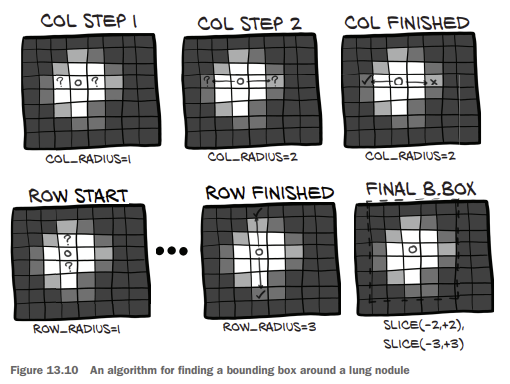

** **굵은 텍스트**(참고)**

* **Hounsfield Unit (HU)**는 의료 영상에서, 특히 CT 스캔에서 사용하는 밀도 측정 단위
* μ는 관심 있는 조직의 X선 감쇠 계수, μ_water는 물의 X선 감쇠 계수, μ_air는 공기의 X선 감쇠 계수
* HU 스케일에서 물은 0 HU로 정의되고, 공기는 대략 -1000 HU로 정의, 따라서 -700 HU는 물보다 조금 덜 밀도가 높은 조직을 나타냄(HU가 낮을수록 밀도 낮음)
* 의학적 맥락에서 -700 HU는 폐 조직과 같은 상대적으로 낮은 밀도의 조직을 나타내는 값으로 사용됨(폐 조직은 공기를 많이 포함하고 있기 때문에 HU 스케일에서 낮은 값 가짐)
* 특정 조직의 HU 값이 그 조직의 물리적 밀도와 직접적으로 일치하는 것은 아니어서 0.3 g/cc와 같다고 말하기는 어려움?

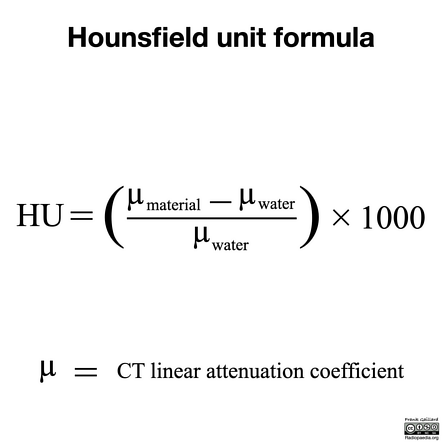

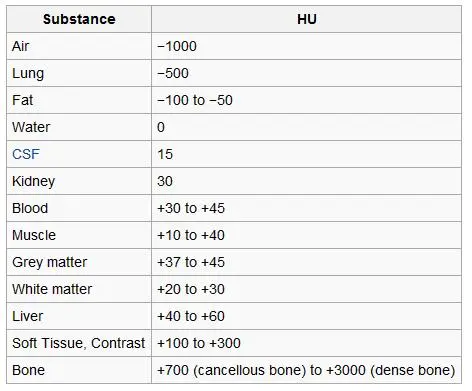

In [ ]:
# dsets.py:127-176
# 3차원 어노테이션 마스크 만들기
def buildAnnotationMask(self, positiveInfo_list, threshold_hu = -700):  # positiveInfo_list는 양성 소견(결절)에 대한 정보 포함하는 구조체 목록
                                                                        # threshold_hu는 주변 조직과 결절 구분하는 Hounsfield 단위(HU)의 임계값(-700HU 또는 0.3g/cc)
    # 주어진 HU 배열과 동일한 크기의 bool 타입 배열 생성, 모든 값은 초기에 False(일반 폐 조직)로 설정
    boundingBox_a = np.zeros_like(self.hu_a, dtype=np.bool)             #  self.hu_a와 동일한 모양의 3차원 numpy 배열로 초기화
                                                                        # 모든 값은 기본적으로 False로 설정되어 어떤 복셀도 초기에는 결절의 일부가 아님을 나타냄

    # 양성 소견 목록에 대해 반복
    for candidateInfo_tup in positiveInfo_list:     # positiveInfo_list 순회하면서 각 항목의 XYZ 좌표에 있는 결절의 중심점 정보 처리
        center_irc = xyz2irc(                       # xyz2irc 함수로 XYZ 좌표를 IRC(인덱스/행/열) 좌표로 변환
            candidateInfo_tup.center_xyz,
            self.origin_xyz,                        # origin_xyz, vxSize_xyz, direction_a는 좌표를 올바르게 변환하는 데 필요한 정보를 제공하는 클래스의 속성 또는 메서드
            self.vxSize_xyz,
            self.direction_a,
        )
        # IRC 좌표 사용해 배열의 중심점 인덱스 가져오기
        ci = int(center_irc.index)                  # ci, cr, cc는 현재 결절 중심 복셀의 변환된 IRC 인덱스를 저장
        cr = int(center_irc.row)
        cc = int(center_irc.col)

        # 인덱스 방향의 초기 반경 설정
        index_radius = 2
        try:  # 임계값보다 큰 HU 값을 가진 복셀 만날 때까지 반경 확장
            while self.hu_a[ci + index_radius, cr, cc] > threshold_hu and \
                    self.hu_a[ci - index_radius, cr, cc] > threshold_hu:      # 현재 복셀의 인덱스(ci)에서 시작하여 index_radius 증가시키면서 임계값보다 큰 HU 값 가진 복셀이 있는지 확인
                index_radius += 1                                             # 루프는 ci + index_radius와 ci - index_radius 위치에서 복셀의 HU 값을 검사하고, 두 값 모두 임계값보다 크면 index_radius를 증가시켜 계속 검사
        except IndexError:                                                    # 배열 경계를 넘어 검색하려 하면 IndexError 발생할 수 있고, 이 경우 except 블록 실행되어 index_radius 값을 1 줄여서 배열 범위를 벗어나지 않게 함
            index_radius -= 1

        # 행 방향 초기 반경 설정
        row_radius = 2
        try:  # 임계값보다 큰 HU 값을 가진 복셀 만날 때까지 반경 확장
            while self.hu_a[ci, cr + row_radius, cc] > threshold_hu and \
                    self.hu_a[ci, cr - row_radius, cc] > threshold_hu:
                row_radius += 1
        except IndexError:  # 배열 경계 넘어가면 반경 줄이기
            row_radius -= 1

        # 열 방향 초기 반경 설정
        col_radius = 2
        try:  # 임계값보다 큰 HU 값을 가진 복셀 만날 때까지 반경 확장
            while self.hu_a[ci, cr, cc + col_radius] > threshold_hu and \
                    self.hu_a[ci, cr, cc - col_radius] > threshold_hu:
                col_radius += 1
        except IndexError:  # 배열 경계 넘어가면 반경 줄이기
            col_radius -= 1

        # 검증 위한 assert문은 필요할 때 주석 해제하여 사용
        # assert index_radius > 0, repr([candidateInfo_tup.center_xyz, center_irc, self.hu_a[ci, cr, cc]])
        # assert row_radius > 0
        # assert col_radius > 0

        # 계산된 반경 사용해 양성 소견이 있는 영역을 True로 설정하여 경계 상자 만들기
        boundingBox_a[
              ci - index_radius: ci + index_radius + 1,            # 결절 중심에서 계산된 index_radius, row_radius, col_radius 값을 사용하여 경계 상자 정의
              cr - row_radius: cr + row_radius + 1,                # 중심점(ci, cr, cc)에서 이 반경만큼 확장하여 만든 경계 상자 내의 모든 복셀을 True로 설정(결절이 존재할 가능성 있는 마스크 영역)
              cc - col_radius: cc + col_radius + 1] = True

    # 최종 마스크 생성, 경계 상자 안의 임계값 이상 HU 값 가진 복셀만 True로 설정
    mask_a = boundingBox_a & (self.hu_a > threshold_hu)           # boundingBox_a (경계 상자가 표시된 마스크)와 self.hu_a > threshold_hu (임계값보다 높은 HU 값을 가진 복셀을 나타내는 조건) AND 연산하여 결합
                                                                  # 결과적으로, mask_a는 경계 상자 내부이면서 임계값보다 높은 HU 값 가진 복셀에 대해 True, 그렇지 않은 복셀 대해 False 가지는 마스크 배열
    # 생성된 마스크 반환
    return mask_a

# 13.5 세그멘테이션을 위한 데이터셋 업데이트(2B)-2

2024년 1월 7일(이하 책 10장을 함께 참조)

## 13.5.3 실측 데이터 만들기

### **책에 따로 설명되어 있지 않은 dsets.py 코드 앞부분**

In [ ]:
# dsets.py:1-41
# 파이썬 표준 라이브러리 및 서드파티 라이브러리 임포트
import copy
import csv
import functools
import glob
import math
import os
import random

from collections import namedtuple # collections 모듈에서 제공하는 namedtuple은 튜플과 유사하지만,
                                   # 필드에 이름을 부여할 수 있는 데이터구조체 생성 가능

import SimpleITK as sitk # SimpleITK는 의료 영상 처리 위한 오픈 소스 소프트웨어(10장 350쪽 참조)
                         # 다양한 형식의 의료 영상 데이터 읽기, 변환, 처리, 세그멘테이션, 등록, 분석 등 작업 수행
import numpy as np
import scipy.ndimage.morphology as morph # Scipy 라이브러리의 하위 모듈로, 영상 처리에 사용되는 다양한 형태학적(morphological) 연산 제공
                                         # 영상 데이터 팽창(dilation), 침식(erosion) 등 형태학적 변환 함수 포함

import torch
import torch.cuda
import torch.nn.functional as F
from torch.utils.data import Dataset

from util.disk import getCache
from util.util import XyzTuple, xyz2irc
from util.logconf import logging

log = logging.getLogger(__name__) # 현재 모듈(__name__)의 로깅 설정 가져와 로거 객체(log) 생성
# log.setLevel(logging.WARN)
# log.setLevel(logging.INFO)
log.setLevel(logging.DEBUG)       # 가장 낮은 로그 레벨인 DEBUG는 그 이상 레벨의 모든 로그 메시지가 기록되게 함(가장 자세한 정보 제공)
                                  # INFO, WARN 레벨은 주석처리되어 있음

raw_cache = getCache('part2ch13_raw') # 캐시 메커니즘 초기화, 'part2ch13_raw'라는 이름으로 캐시 생성

# namedtuple 사용하여 튜플 형태의 데이터 구조체 MaskTuple, CandidateInfoTuple 정의
MaskTuple = namedtuple('MaskTuple', 'raw_dense_mask, dense_mask, body_mask, air_mask, raw_candidate_mask, candidate_mask, lung_mask, neg_mask, pos_mask')
      # raw_dense_mask: 원본 밀도 마스크(원시 스캔 데이터 밀도 정보), dense_mask: 처리된 밀도 마스크, body_mask: 몸체 마스크(신체 부분만 추출)
      # air_mask: 공기가 차지하는 영역 나타내는 마스크, raw_candidate_mask: 원본 후보 마스크(원시 데이터에서 후보 영역 표시), candidate_mask: 처리된 후보 마스크
      # lung_mask: 폐 영역 표시 마스크, neg_mask: 음성 샘플 마스크(결절이 없는 영역), pos_mask: 양성 샘플 마스크(결절이 있는 영역)
CandidateInfoTuple = namedtuple('CandidateInfoTuple', 'isNodule_bool, hasAnnotation_bool, isMal_bool, diameter_mm, series_uid, center_xyz')
      # isNodule_bool: 후보가 실제로 결절인지 아닌지 나타내는 불리언 값, hasAnnotation_bool: 후보가 애노테이션(의료 전문가에 의한 표시) 가지고 있는지
      # isMal_bool: 결절이 악성인지 나타내는 불리언 값, diameter_mm: 결절 지름을 밀리미터 단위로 표시
      # series_uid: 결절 후보가 포함된 CT 스캔의 고유 식별자(Unique Identifier), center_xyz: 결절 후보의 중심 나타내는 3차원 좌표
      # (예) CandidateInfoTuple(True, True, False, 5.5, '1.3.6.1.4.1', (50, 50, 50))

@functools.lru_cache(1) # functools.lru_cache 데코레이터 사용하여 함수 결과 캐싱, 캐시 크기가 1이면 가장 최근에 호출된 결과만 저장
                        # 새로운 결과 캐시될 때 이전의(lru; Least Recently Used, 가장 최근에 사용되지 않은) 항목 삭제
                        # 함수 호출될 때 이전에 같은 인자로 함수가 호출된 결과가 캐시에 있는지 확인하여 있으면 함수 다시 실행 않고 캐시된 결과 바로 반환하므로,
                        # 반복 계산 줄이고 성능 향상에 도움(10장 346쪽 참조)
# getCandidateInfoList 함수 정의
def getCandidateInfoList(requireOnDisk_bool=True):
    mhd_list = glob.glob('data-unversioned/part2/luna/subset*/*.mhd') # 모든 .mhd 파일 찾아서 리스트로 반환
                                                                      # glob.glob은 주어진 'pattern'과 일치하는 모든 파일의 경로를 리스트로 반환하는 함수
      # 'data-unversioned/part2/luna/' 디렉토리 내의 'subset*'으로 시작하는 모든 서브디렉토리에서 확장자가 '.mhd'인 모든 파일을 찾기 때문에,
      # 서브셋을 아직 모두 다운로드하지 않았더라도 데이터 사용할 수 있음
    presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list} # 디스크에 존재하는 series_uid의 집합 생성
      # "os.path.split(p)"는 파일 경로를 디렉토리 부분과 파일 이름 부분으로 분리
      # "[-1]"은 분리된 결과 튜플의 마지막 요소(파일 이름)를 가져오는 인덱싱
      # "[:-4]"는 문자열 슬라이싱 사용하여 파일 이름의 마지막 4글자('.mhd' 확장자 부분)를 제외, 결국 각 파일(이름)의 series_uid 추출
      # "for p in mhd_list"로 mhd_list에 있는 모든 경로 p에 대해 반복하여 집합 {} 생성(집합은 중복을 허용하지 않으므로 각 series_uid는 고유하게 하나만 저장)

#### **(참고) namedtuple**





* 점프 투 파이썬 009 자료에 이름을 붙이려면? collections.namedtuple https://wikidocs.net/104956

In [ ]:
from collections import namedtuple

data = [
    ('홍길동', 23, '01099990001'),
    ('김철수', 31, '01099991002'),
    ('이영희', 29, '01099992003'),
    ]

Employee = namedtuple('Employee', 'name, age, cellphone')
data = [Employee(emp[0], emp[1], emp[2]) for emp in data]

emp = data[0]

print(emp.name, emp.age, emp.cellphone)

홍길동 23 01099990001


**(참고) 파이썬 logging 모듈에서 사용하는 log level**

* 로그 레벨은 로그의 중요도나 긴급성을 나타내는 지표
* 다양한 로그 레벨 통해 프로그램의 여러 이벤트를 분류하고, 필요에 따라 적절한 로그만 선택적으로 기록하거나 출력할 수 있음
* https://docs.python.org/3.7/howto/logging.html#when-to-use-logging

 1. **DEBUG**
  * 프로그램 내부 상태 이해하거나 문제 해결 위한 상세한 정보 제공
  * 가장 낮은 레벨의 로그로, 코드의 진행 상황, 변수 값 등 디버깅에 유용한 상세한 정보 포함

 2. **INFO**
  * 일반적인 운영에 관한 정보 제공
  * 프로그램의 정상적인 작동 상태나 진행 상황에 관한 정보 기록

 3. **WARNING**
  * 잠재적인 문제 알릴 때 사용
  * 프로그램은 정상적으로 작동하고 있지만, 향후 발생할 수 있는 문제에 대한 경고나 주의를 요하는 상황 나타냄

 4. **ERROR**
 * 심각한 문제가 발생한 상태로, 프로그램의 정상적 작동에 영향을 미치는 오류가 발생했음을 의미
 * 오류의 원인이나 발생 상황에 관한 정보 포함

 5. **CRITICAL**
 * 매우 심각한 문제가 발생
 * 프로그램이나 시스템의 중대한 손상, 데이터 손실 또는 기능 마비 등을 알림
 * 가장 높은 레벨의 로그로, 즉각적인 조치가 필요한 상황을 나타냄

* 예컨대, 로그 레벨을 **WARNING**으로 설정하면, **WARNING**, **ERROR**, **CRITICAL** 레벨 로그만 기록하고, **DEBUG**, **INFO** 레벨 로그는 무시

 (요약)
 https://hwangheek.github.io/2019/python-logging/

 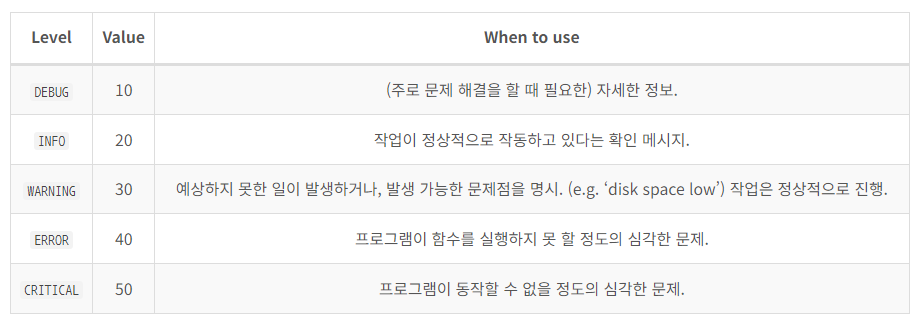





#### **(10장 복습, 341쪽)**



CT 데이터는 .mhd 파일과 .raw 파일로 구성
  * **.mhd 파일**
   * **메타데이터** 담은 파일(Meta Header File)
   * 영상의 차원, 데이터 타입, 복셀 크기, 원점 좌표, 방향성 등 정보 포함
   * **텍스트 형식**으로 되어 있어 사람이 읽을 수 있으며, 영상 데이터 파일의 위치를 지정
  * **.raw(또는 .zraw 파일)**
   * **실제 영상 데이터** 포함
   * 보통 **이진 형식**으로 저장되고, .mhd 파일에 의해 참조됨
  * 예컨대, 시리즈 UID 1.2.3의 경우, 1.2.3.mhd와 1.2.3.raw 두 가지 파일이 있는 식

  * LUNA 데이터셋의 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260**.mhd** 파일을 열면

   ObjectType = Image  
NDims = 3  
BinaryData = True  
BinaryDataByteOrderMSB = False  
CompressedData = False  
TransformMatrix = 1 0 0 0 1 0 0 0 1  
Offset = -198.10000600000001 -195 -335.209991  
CenterOfRotation = 0 0 0  
AnatomicalOrientation = RAI  
ElementSpacing = 0.7617189884185791 0.7617189884185791 2.5  
DimSize = 512 512 121  
ElementType = MET_SHORT  
ElementDataFile = 1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.raw

### ④ 어노테이션 데이터 정제하기(cleaning up), 480쪽

* **candidates.csv** 파일에서는 후보 데이터가 여러 번 나타나는 경우가 있고, 같은 결절 데이터에 대하여 다른 어노테이션이 붙어 있기도    
→ 이를 추린 것이 **annotations_with_malignancy.csv**
* 그러나 머신 러닝 모델 훈련시킬 때는 어노테이션된 양성 샘플(실제 결절)뿐 아니라 음성 샘플(결절이 아닌 후보)도 중요
* **candidates.csv** 파일은 음성 샘플을 추가로 제공하여 **데이터셋의 다양성** 높이고, **실제 임상 환경과 비슷한 조건**의 시뮬레이션을 할 수 있게 하며, 모델이 결절 아닌 것을 정확하게 결절이 아니라고 가려내는 능력을 **평가**하는 데 사용할 수도 있음
* 결론적으로,
  * **annotations_with_malignancy.csv** 파일은 **어노테이션된 양성 결절 데이터**,
  * **candidates.csv** 파일은 **어노테이션되지 않은 음성 결절 후보 데이터**를 제공하여,
  * 모델이 결절을 탐지하는 데 필요한 더 균형 잡힌 데이터셋을 구축하는 데 도움(**모델의 일반화 능력** 향상)

In [ ]:
# dsets.py:43-60
candidateInfo_list = [] # 후보 정보를 저장할 빈 리스트 준비(초기화)

with open('data/part2/luna/annotations_with_malignancy.csv', "r") as f: # 'annotations_with_malignancy.csv' 파일을 읽기 모드로 열기
    for row in list(csv.reader(f))[1:]:                                 # csv.reader 사용하여 파일 내용을 읽고, 첫 번째 행(헤더) 제외하고 반복(각 행은 각기 하나의 결절 정보)
        series_uid = row[0]                                             # 각 행 첫 번째 열에서 series_uid 추출
        annotationCenter_xyz = tuple([float(x) for x in row[1:4]])      # 각 행 2~4번째 열의 값(중심 좌표)을 실수로 변환하여 튜플로 저장
        annotationDiameter_mm = float(row[4])                           # 각 행 5번째 열의 값(결절 지름)을 실수로 변환
        isMal_bool = {'False': False, 'True': True}[row[5]]             # 각 행 6번째 열의 값(악성 여부)을 불리언으로 변환, 'False' 문자열은 False로, 'True' 문자열은 True로 매핑

        # 후보 정보 나타내는 CandidateInfoTuple 객체 생성하여 candidateInfo_list에 추가
        candidateInfo_list.append(
            CandidateInfoTuple(
                True,         # isNodule_bool
                True,         # hasAnnotation_bool
                isMal_bool,
                annotationDiameter_mm,
                series_uid,
                annotationCenter_xyz,
            )
        )

In [ ]:
# dsets.py:62-85
# 'candidates.csv' 파일을 읽기 모드로 열기
with open('data/part2/luna/candidates.csv', "r") as f: # 'candidates.csv' 파일을 읽기 모드로 열기(어노테이션된 데이터 외에도 결절 후보 될 수 있는 다른 지점들 목록이 을 수)
    for row in list(csv.reader(f))[1:]:                # csv.reader 사용하여 파일 내용을 읽고, 첫 번째 행(헤더) 제외하고 반복
        series_uid = row[0]                            # 각 행 첫 번째 열에서 series_uid 추출

        if series_uid not in presentOnDisk_set and     # 현재 처리하려는 series_uid 디스크에 존재하지 않고(presentOnDisk_set은 디스크에 존재하는 .mhd 파일들의 series_uid 집합)
            requireOnDisk_bool:                        # requireOnDisk_bool == True이면(책 346쪽, 디스크에 데이터가 있는 경우만 처리 계속하는 변수)
            continue                                   # 다음 행으로 넘어감

        isNodule_bool = bool(int(row[4]))              # 네 번째 열 값을 정수 변환 후 1이면 True, 0이면 False로 변환해 isNodule_bool 결정
        candidateCenter_xyz = tuple([float(x) for x in row[1:4]]) # 두 번째부터 네 번째 열까지 값을 float으로 변환해 후보의 중심 좌표로 설정

        if not isNodule_bool:            # isNodule_bool이 False이면(후보가 결절이 아니면),
            candidateInfo_list.append(   # 해당 후보의 정보를 담은 CandidateInfoTuple 객체를 candidateInfo_list에 추가
                CandidateInfoTuple(
                    False,               # isNodule_bool
                    False,               # hasAnnotation_bool, 결절이 아니므로 어노테이션도 없음
                    False,               # isMal_bool, 악성 여부 정보도 없음
                    0.0,                 # diameter_mm, 지름 정보도 없음
                    series_uid,          # series_uid
                    candidateCenter_xyz, # 중심 좌표
                )
            )

candidateInfo_list.sort(reverse=True)    # 후보 정보 리스트 정렬하되, isNodule_bool이 True인 항목을 앞으로 오게 함(내림차순)
return candidateInfo_list                # 완성된 후보 정보 리스트 반환

**(참고) requireOnDisk_bool**
 * 10장 346쪽도 참조
 * **requireOnDisk_bool = True:**
   * 데이터가 디스크에 실제로 존재할 때만 해당 데이터를 처리하게 함
   * 예를 들어, 큰 데이터셋에서 일부만 다운로드했거나 일부 파일 누락된 경우, 누락된 데이터에 대한 처리를 시도하지 않게 함
   * 불완전한 데이터로 인한 오류나 예외 상황을 방지할 수 있으며, 데이터셋이 완전하게 다운로드되고 정제된 상태에서 훈련이나 분석을 진행하려는 경우에 적합

 * **requireOnDisk_bool = False:**
   * 데이터가 디스크에 실제로 존재하지 않더라도 처리를 계속 진행
   * 완전한 데이터셋이 필요하지 않은 상황, 예를 들어 빠른 테스트, 프로토타이핑, 데이터의 부분적 사용 등의 경우에 유용
   * 그러나 이 설정을 사용할 때는 누락된 데이터로 인해 발생할 수 있는 문제점이나 예외 처리에 주의해야


### ② CT 초기화 때 마스크 생성 호출하기, 478쪽


In [ ]:
# dsets.py:87-96
# getCandidateInfoDict 함수 정의
@functools.lru_cache(1)                                             # 다른 형태의 데이터 반환하므로 getCandidateInfoList 함수와 별도의 캐시 유지
def getCandidateInfoDict(requireOnDisk_bool=True):
    candidateInfo_list = getCandidateInfoList(requireOnDisk_bool)   # getCandidateInfoList 함수 호출하여 결절 후보 정보를 리스트로 반환
    candidateInfo_dict = {}                                         # 후보 정보 저장할 빈 딕셔너리 준비(초기화)

    for candidateInfo_tup in candidateInfo_list:                    # candidateInfo_list에 있는 각 candidateInfo_tup(결절 후보 정보 담은 튜플)에 대하여 반복
        candidateInfo_dict.setdefault(candidateInfo_tup.series_uid, # setdefault 메서드는 series_uid가 딕셔너리에 없으면 빈 리스트 []를 기본값으로 설정하여 새로운 키-값 쌍을 추가하고, series_uid를 키로 사용
                                      []).append(candidateInfo_tup) # series_uid가 이미 딕셔너리에 있으면, 해당 키에 대한 현재 값(CandidateInfoTuple 객체들의 리스트) 반환
                                                                    # 반환된 리스트(새로 생성되었거나 이미 존재하는)에 후보 정보 튜플(candidateInfo_tup)을 append 메서드로 추가
                                                                    # 하나의 series_uid에 여러 CandidateInfoTuple 객체(candidateInfo_tup) 있을 수 있으므로 리스트로 저장하는 것

    return candidateInfo_dict                                       # 완성된 후보 정보 딕셔너리 반환

**(참고)**
* **getCandidateInfoList 함수**
  * 결절 후보 정보를 리스트 형태로 반환
  * annotations_with_malignancy.csv와 candidates.csv 두 파일로부터 결절 후보들의 정보를 읽어 CandidateInfoTuple 객체로 변환하고, 이 객체들을 candidateInfo_list에 추가
  * 반환되는 리스트는 결절 후보들의 종합적인 정보를 담고 있으며, 이후 다른 처리 과정에서 사용

* **getCandidateInfoDict 함수**
 * getCandidateInfoList 함수로부터 얻은 결절 후보 리스트를 사용하여 딕셔너리 형태로 데이터를 구조화합
 * 이 딕셔너리는 series_uid를 키로 하고, 해당 series_uid에 해당하는 모든 결절 후보들의 리스트를 값으로 가짐
 * 이러한 구조는 특정 series_uid에 속한 결절 후보들을 효율적으로 조회하고 관리할 수 있게 해줌

In [ ]:
# dsets.py:98-125
# Ct 클래스 생성
class Ct:
    def __init__(self, series_uid):
            mhd_path = glob.glob(
            'data-unversioned/part2/luna/subset*/{}.mhd'.format(series_uid)    # 특정 series_uid 해당하는 .mhd 파일 경로 찾기
        )[0]  # 하나의 series_uid는 일반적으로 하나의 .mhd 파일에만 대응되기 때문에 [0]으로, 반환된 파일 목록 중 첫 번째(그리고 사실은 유일한) 파일 경로 선택

        ct_mhd = sitk.ReadImage(mhd_path)                                      # 해당 파일을 읽어서 SimpleITK 이미지 객체 생성(10장 350쪽 참조)
        self.hu_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32) # SimpleITK 라이브러리로 ct_mhd 객체(CT 스캔 이미지)로부터 HU(Hounsfield Unit) 배열 추출, numpy 배열로 변환

        # 클래스 인스턴스 변수 초기화(10장 357쪽 참조)
        self.series_uid = series_uid                                           # series_uid
        self.origin_xyz = XyzTuple(*ct_mhd.GetOrigin())                        # 스캔의 원점 좌표(*는 unpacking 연산자로 x, y, z축 각 요소를 분리하여 XyzTuple 구조체에 전달)
        self.vxSize_xyz = XyzTuple(*ct_mhd.GetSpacing())                       # 복셀의 크기
        self.direction_a = np.array(ct_mhd.GetDirection()).reshape(3, 3)       # CT 영상 데이터의 방향을 나타내는 9개 요소 포함한 튜플을 numpy 배열로 변환하고 3x3 행렬로 재구성

        # getCandidateInfoDict 함수로 모든 후보 정보를 딕셔너리 형태로 가져오고, 그중 self.series_uid에 해당하는 후보들과 짝지어진 리스트 선택
        candidateInfo_list = getCandidateInfoDict()[self.series_uid]

        # 양성 결절 후보(isNodule_bool == True)만 필터링하여 positiveInfo_list에 저장
        self.positiveInfo_list = [
            candidate_tup
            for candidate_tup in candidateInfo_list  # candidateInfo_list 내의 각 candidate_tup(결절 후보)에 대해 반복
            if candidate_tup.isNodule_bool
        ]

        # 양성 결절 후보에 대한 어노테이션 마스크 만들기
        self.positive_mask = self.buildAnnotationMask(self.positiveInfo_list) # self.positive_mask 통해 양성인 단면만 추출

        # 마스크에서 양성인 단면만 추출
        self.positive_indexes = (self.positive_mask.sum(axis=(1,2)) # 마스크 각 단면마다 결절 있는 복셀 몇 개인지 합산(2, 3축, 즉 행, 열 기준으로), 3차원 → 각 단면의 결절 존부 나타내는 1차원 배열로 축소
                                .nonzero()[0].tolist())             # 합계가 0이 아닌(결절이 하나 이상 있는) 단면의 인덱스() 찾아, "[0]으로" 첫 번째(깊이) 차원 인덱스만 선택하여 파이썬 리스트로 반환
                                                                    # 결과적으로, 결절이 하나 이상 있는 단면의 인덱스 리스트 반환

### ① 바운딩 박스(2023년 12월 17일 복습), 474쪽

In [ ]:
# dsets.py:127-176
# 3차원 어노테이션 마스크 만들기
    def buildAnnotationMask(self, positiveInfo_list, threshold_hu = -700):  # positiveInfo_list는 양성 소견(결절)에 대한 정보 포함하는 구조체 목록
                                                                            # threshold_hu는 주변 조직과 결절 구분하는 Hounsfield 단위(HU)의 임계값(-700HU 또는 0.3g/cc)
        # 주어진 HU 배열과 동일한 크기의 bool 타입 배열 생성, 모든 값은 초기에 False(일반 폐 조직)로 설정
        boundingBox_a = np.zeros_like(self.hu_a, dtype=np.bool)             # self.hu_a와 동일한 크기의 3차원 numpy 배열로 초기화
                                                                            # 모든 값은 기본적으로 False로 설정되어 어떤 복셀도 초기에는 결절의 일부가 아님을 나타냄

        # 양성 소견 목록에 대해 반복
        for candidateInfo_tup in positiveInfo_list:     # positiveInfo_list 순회하면서 각 항목의 XYZ 좌표에 있는 결절의 중심점 정보 처리
            center_irc = xyz2irc(                       # xyz2irc 함수로 XYZ 좌표를 IRC(인덱스/행/열) 좌표로 변환
                candidateInfo_tup.center_xyz,
                self.origin_xyz,                        # origin_xyz, vxSize_xyz, direction_a는 좌표를 올바르게 변환하는 데 필요한 정보를 제공하는 클래스의 속성 또는 메서드
                self.vxSize_xyz,
                self.direction_a,
            )
            # IRC 좌표 사용해 배열의 중심점 인덱스 가져오기
            ci = int(center_irc.index)                  # ci, cr, cc는 현재 결절 중심의 IRC 인덱스를 저장
            cr = int(center_irc.row)
            cc = int(center_irc.col)

            # 인덱스 방향의 초기 반경 설정
            index_radius = 2
            try:                                                                # 임계값보다 큰 HU 값을 가진 복셀 만날 때까지 반경 확장
                while self.hu_a[ci + index_radius, cr, cc] > threshold_hu and \
                        self.hu_a[ci - index_radius, cr, cc] > threshold_hu:    # 현재 복셀의 인덱스(ci)에서 시작하여 index_radius 증가시키면서 임계값보다 큰 HU 값 가진 복셀이 있는지 확인
                    index_radius += 1                                           # 루프는 ci + index_radius와 ci - index_radius 위치에서 복셀의 HU 값을 검사하고, 두 값 모두 임계값보다 크면 index_radius를 증가시켜 계속 검사
            except IndexError:                                                  # 배열 경계를 넘어 검색하려 하면 IndexError 발생할 수 있고,
                index_radius -= 1                                               # 이 경우 except 블록 실행되어 index_radius 값을 1 줄여서 배열 범위 벗어나지 않게 함

            # 행 방향 초기 반경 설정
            row_radius = 2
            try:                                                                # 임계값보다 큰 HU 값을 가진 복셀 만날 때까지 반경 확장
                while self.hu_a[ci, cr + row_radius, cc] > threshold_hu and \
                        self.hu_a[ci, cr - row_radius, cc] > threshold_hu:
                    row_radius += 1
            except IndexError:                                                  # 배열 경계 넘어가면 반경 줄이기
                row_radius -= 1

            # 열 방향 초기 반경 설정
            col_radius = 2
            try:                                                                # 임계값보다 큰 HU 값을 가진 복셀 만날 때까지 반경 확장
                while self.hu_a[ci, cr, cc + col_radius] > threshold_hu and \
                        self.hu_a[ci, cr, cc - col_radius] > threshold_hu:
                    col_radius += 1
            except IndexError:                                                  # 배열 경계 넘어가면 반경 줄이기
                col_radius -= 1

            # 검증 위한 assert문은 필요할 때 주석 해제하여 사용
            # assert index_radius > 0, repr([candidateInfo_tup.center_xyz, center_irc, self.hu_a[ci, cr, cc]])
            # assert row_radius > 0
            # assert col_radius > 0

            # 계산된 반경 사용해 양성 소견이 있는 영역을 True로 설정하여 경계 상자 만들기
            boundingBox_a[
                  ci - index_radius: ci + index_radius + 1,    # 결절 중심에서 계산된 index_radius, row_radius, col_radius 값을 사용하여 경계 상자 정의
                  cr - row_radius: cr + row_radius + 1,        # 중심점(ci, cr, cc)에서 radius만큼 반경 확장하여 만든 경계 상자 내 모든 복셀을 True로 설정(결절이 존재할 가능성 있는 마스크 영역)
                  cc - col_radius: cc + col_radius + 1] = True # +1을 함으로써 c* + *_radius 위치의 복셀도 포함

        # 최종 마스크 생성, 경계 상자 안의 임계값보다 큰 HU 값 가진 복셀만 True로 설정
        mask_a = boundingBox_a & (self.hu_a > threshold_hu)    # boundingBox_a (경계 상자가 표시된 마스크)와 self.hu_a > threshold_hu (임계값보다 높은 HU 값을 가진 복셀) AND 결합
                                                               # 결과적으로, mask_a는 경계 상자 내부이면서 임계값보다 높은 HU 값 가진 복셀 True, 그렇지 않은 복셀 False 갖는 마스크 배열
        # 생성된 마스크 반환
        return mask_a

### ③ CT와 함께 마스크(chunks of mask)도 캐싱하기, 479쪽

In [ ]:
# dsets.py:178-182
# xyz 좌표를 irc 좌표로 변환하는 함수
def getRawCandidate(self, center_xyz, width_irc):                        # center_xyz: 추출할 후보의 중심 좌표,
      center_irc = xyz2irc(center_xyz, self.origin_xyz, self.vxSize_xyz, # self.origin_xyz, self.vxSize_xyz: CT 스캔 데이터의 원점, 복셀 크기
                         self.direction_a)                               # self.direction_a: CT 스캔 데이터의 방향 정보

    slice_list = [] # 추출할 CT 스캔 데이터의 슬라이스 범위를 저장할 리스트 초기화
                    # 아래에서 center_irc 중심으로 일정 범위(width_irc)에 해당하는 단면의 시작과 끝 인덱스를 계산하여 slice_list에 추가하게

In [ ]:
# dsets.py:183-201(책에 없는 부분)
    for axis, center_val in enumerate(center_irc):             # center_irc의 각 축(x, y, z)에 대하여 해당 축의 중심 좌표와 인덱스 추출
        start_ndx = int(round(center_val - width_irc[axis]/2)) # 시작 인덱스: 중심 좌표에서 너미 절반을 뺀 값 반올림하고 정수로 변환
        end_ndx = int(start_ndx + width_irc[axis])             # 끝 인덱스: 시작 인덱스에 너비 더하여 정수로 변환

        # 중심 좌표가 CT 배열 범위 내에 있는지 확인
        assert center_val >= 0 and center_val < self.hu_a.shape[axis], repr([self.series_uid, center_xyz, self.origin_xyz, self.vxSize_xyz, center_irc, axis])
               # center_val(결절 중심 좌표) 0 이상이고, 해당 축 배열 크기(self.hu_a.shape[axis])보다 작은지 확인
               # repr[] 부분은 assert 구문 실패(조건이 false)했을 때 리스트 내 요소들을 문자열 표현으로 변환하여 오류 메시지에 포함

        # 시작 인덱스가 배열 범위 밖에 있으면 조정
        if start_ndx < 0:
            # log.warning("Crop outside of CT array: {} {}, center:{} shape:{} width:{}".format(
            #    self.series_uid, center_xyz, center_irc, self.hu_a.shape, width_irc))
            # CT 배열 범위 밖으로 벗어난다는 경고메시지가 로그에 기록: "Crop outside of CT array: [series_uid] [center_xyz], center:[center_irc] shape:[self.hu_a.shape] width:[width_irc]"
            start_ndx = 0                  # 시작 인덱스 0으로 설정
            end_ndx = int(width_irc[axis]) # 끝 인덱스를 추출 영역 너비(width_irc[axis]) 이용해 조정

        # 끝 인덱스가 배열 범위 밖에 있으면 조정
        if end_ndx > self.hu_a.shape[axis]:
            # log.warning("Crop outside of CT array: {} {}, center:{} shape:{} width:{}".format(
            #     self.series_uid, center_xyz, center_irc, self.hu_a.shape, width_irc))
            # CT 배열 범위 밖으로 벗어남을 경고
            end_ndx = self.hu_a.shape[axis]                          # 끝 인덱스를 배열 크기로 설정
            start_ndx = int(self.hu_a.shape[axis] - width_irc[axis]) # 시작 인덱스를 추출 영역 너비(width_irc[axis]) 이용해 조정

        slice_list.append(slice(start_ndx, end_ndx)) # 계산된 시작 및 끝 인덱스 사용하여 슬라이스 객체 생성하고, 이를 slice_list에 추가

In [ ]:
# dsets.py:203-206
ct_chunk = self.hu_a[tuple(slice_list)]               # ct_chunk: CT 스캔 데이터의 특정 부분(중심 좌표 주변) 추출
                                                      # tuple(slice_list): 슬라이스 객체의 인덱스 범위를 튜플로 변환하여 인덱싱에 사용
    pos_chunk = self.positive_mask[tuple(slice_list)] # 10장 359쪽에서 추가된 코드, pos_chunk: 같은 영역의 양성 마스크 데이터 추출
    return ct_chunk, pos_chunk, center_irc            # 추출한 CT 데이터 조각, 양성 마스크 조각, 중심 좌표의 irc 좌표 반환

In [ ]:
# dsets.py:208-210(13장에는 없는 부분, 10장 362쪽 참조)
@functools.lru_cache(1, typed=True)         # 함수 결과 캐싱하여 재호출 시 이전 결과 재사용. 인자 타입까지 고려하여 같은 값 갖더라도 타입 다르면 별도의 캐시 항목으로 처리
def getCt(series_uid):                      # 주어진 series_uid에 대하여 Ct 클래스의 객체(인스턴스) 생성하여 반환
    return Ct(series_uid)                   # 캐싱 통해 동일한 series_uid에 대한 재호출 시 새로운 인스턴스 생성 방지

In [ ]:
# dsets.py:212-218
@raw_cache.memoize(typed=True)              # raw_cache.memoize 데코레이터 사용하여 함수 결과 캐싱, 함수가 동일한 인자로 호출될 때 이전에 계산된 결과를 재사용
def getCtRawCandidate(series_uid, center_xyz, width_irc):
    ct = getCt(series_uid)                  # getCt 함수 호출하여 해당 series_uid에 대한 Ct 클래스의 객체 가져옴. getCt 함수의 캐싱된 결과 사용하여 필요한 경우에만 새 인스턴스 생성
    ct_chunk, pos_chunk, center_irc = ct.getRawCandidate(center_xyz, width_irc)
                                            # ct 객체의 getRawCandidate 메서드 호출하여, 주어진 중심 좌표(center_xyz)와 너비(width_irc)에 기반한
                                            # CT 데이터 조각(ct_chunk), 양성 마스크 데이터 조각(pos_chunk), 중심 좌표의 irc 좌표(center_irc) 가져옴
    ct_chunk.clip(-1000, 1000, ct_chunk)    # 추출된 CT 데이터 조각(ct_chunk)의 HU 값 범위를 -1000(공기)부터 1000(뼈) 사이로 제한(10장 351쪽 참조)하기 위해
                                            # clip 함수 사용하여 지정된 범위 벗어나는 값을 범위 내 값으로 대체
    return ct_chunk, pos_chunk, center_irc  # 처리된 CT 데이터 조각, 양성 마스크 데이터 조각, 중심 좌표의 irc 좌표 반환

#### **(참고) 슬라이스 객체**

* https://docs.python.org/ko/3/c-api/slice.html
* 시퀀스 일부를 나타내는 객체
* 3개 인수[시작 인덱스, 끝 인덱스, 스트라이드(각 요소 간 간격)] 가짐
* 시작 인덱스는 0부터 시작, 끝 인덱스는 종료 지점으로 슬라이스에 포함되지 않음

In [ ]:
my_list=[1, 2, 3, 4, 5]

slice_obj = slice(1, 4, 2)
selected_slice = list(my_list[slice_obj])

selected_slice

[2, 4]

#### **(참고) repr와 str**




* **repr() 함수**
  * 파이썬 내장 함수로, 객체의 `__repr__` 메서드 호출
  * 클래스 작성할 때 `__repr__` 메서드 정의하여 해당 객체의 문자열 표현을 어떻게 생성할지 결정할 수 있고, `__repr__` 메서드가 정의되어 있지 않은 경우 파이썬은 기본적 문자열 표현 제공
  * repr 메서드는 객체를 **개발자가 이해할 수 있는 형태**로 표현하여 디버깅과 개발 목적으로 사용하고, 객체의 **'공식적인'** 문자열 표현을 생성
  * repr 메서드가 반환하는 문자열은 되도록 해당 객체를 재생성할 수 있는 '실행 가능한' 형태를 가지게 하는 것이 바람직, 예컨대 repr(2)는 '2'를 반환, repr([1, 2, 3])는 '[1, 2, 3]'을 반환
  * repr에 의해 반환된 문자열은 eval() 함수의 입력값이 될 수 있음

* **str() 함수**
 * 역시 파이썬 내장 함수로, 객체의 `__str__` 메서드 호출
 * 객체의 클래스에 `__str__` 메서드 정의되어 있지 않은 경우, 파이썬은 `__repr__` 메서드의 결과를 대신 사용
 * str 메서드는 객체를 **사용자가 이해하기 쉬운 형태**로 표현하여 주로 사용자에게 정보를 제공하는 목적으로 사용되며, 객체의 **'비공식적인'** 또는 **'사용자 친화적인'** 문자열 표현을 생성
 * str 메서드는 print() 함수 통해서도 호출될 수 있음
 * str에 의해 생성된 문자열을 eval() 함수로 실행할 수 없음

## 13.5.4. Luna2dSegmentationDataset 구현

* 훈련 데이터와 검증 데이터 분리하고
 * 검증 데이터 위한 일반적인 **기본(base) 클래스**
 * 훈련 데이터 위한 기본 클래스를 상속한 **서브클래스** 생성
* 세그멘테이션 모델에서는 각 단면을 3차원 배열로 취급하는 대신,
 * 단일 채널의 2차원 이미지로 취급하고, 이러한 2차원 이미지들을 **여러 채널 가진 하나의 멀티채널 2D 이미지**로 쌓아 처리
 * RGB 이미지에서 각 색상 채널을 다루는 것과 비슷

In [ ]:
# dsets.py:220-223
@raw_cache.memoize(typed=True)
def getCtSampleSize(series_uid):
    ct = Ct(series_uid)                               # Ct 클래스의 새 인스턴스를 생성하고 ct 변수에 할당
    return int(ct.hu_a.shape[0]), ct.positive_indexes # CT 스캔의 전체 단면 개수([0] = 깊이)와, 양성 결절이 있는 단면의 인덱스(위치)를 나타내는 리스트 반환

In [ ]:
# dsets.py:226-248
class Luna2dSegmentationDataset(Dataset):             # PyTorch의 Dataset 클래스 상속받아 Luna2dSegmentationDataset 클래스(LUNA 2D 분할 데이터셋) 정의
    def __init__(self,                                # 여러 매개변수 받아 클래스의 인스턴스 설정
                 val_stride=0,                        # 검증 세트 생성할 때 사용하는 스트라이드 값(검증 세트 만들 때마다 몇 번째 시리즈 사용할지)
                 isValSet_bool=None,                  # 이 매개변수가 True일 경우 검증 세트로 사용, False 또는 None이면 훈련 세트로 사용
                 series_uid=None,                     # 지정하면 해당 시리즈만 데이터셋으로 사용, 지정하지 않으면 모든 시리즈 사용
                 contextSlices_count=3,               # 각 데이터 포인트에 포함될 인접 슬라이스 수(13장에서 추가된 매개변수)
                 fullCt_bool=False,                   # 이 매개변수가 True일 경우 전체 CT 스캔 사용[사전 지식 없이, 전체 프로세스(end-to-end 파이프라인) 성능 평가에 유용],
                                                                    # False면 특정 부분만 사용(양성 마스크 있는 CT 단면 대해서만 룬련 시 검증)
            ):
        self.contextSlices_count = contextSlices_count # 컨텍스트 슬라이스 개수
        self.fullCt_bool = fullCt_bool                 # 전체 CT 스캔을 사용할 것인지

        if series_uid:
            self.series_list = [series_uid]            # 특정 series_uid가 제공되면, 해당 series_uid만 series_list에 추가
        else:
            self.series_list = sorted(getCandidateInfoDict().keys()) # series_uid가 제공되지 않으면, getCandidateInfoDict()에서 반환된 딕셔너리의 모든 키, 즉 모든 series_uid 정렬하여 series_list에 추가

        if isValSet_bool:                                     # 인스턴스가 검증 세트(val set)로 사용될 경우의 동작을 정의
            assert val_stride > 0, val_stride                 # val_stride가 0보다 크지 않으면(0이거나 음수이면) AssertionError 발생
            self.series_list = self.series_list[::val_stride] # val_stride 간격으로 시리즈 선택, 예를 들어 val_stride가 2라면 리스트의 모든 두 번째 요소 선택
            assert self.series_list                           # 시리즈 리스트가 비어있지 않은지 확인(비어 있으면 AssertionError 발생)
        elif val_stride > 0:                                  # 검증 세트로 사용되지 않고, val_stride가 0보다 클 경우(훈련 세트에서 일정 간격으로 시리즈 제거하는 동작 정의)
            del self.series_list[::val_stride]                # val_stride 간격으로 시리즈를 제거
            assert self.series_list                           # 시리즈 리스트가 비어있지 않은지 확인

* 결절 후보가 포함된 CT 스캔은 이제 훈련셋에 있거나 검증셋에 있는 것으로 분리됨

In [ ]:
# dsets.py:250-259
        self.sample_list = []                                           # 이 데이터셋에서 사용할 샘플(CT 스캔의 각 슬라이스)의 리스트
        for series_uid in self.series_list:                             # series_list에 있는 각 series_uid에 대해 반복
            index_count, positive_indexes = getCtSampleSize(series_uid) # getCtSampleSize 함수 호출하여 특정 series_uid 대한 전체 슬라이스 개수(index_count), 양성 결절 있는 슬라이스의 인덱스 리스트(positive_indexes) 가져옴

            if self.fullCt_bool:                                          # fullCt_bool == True인 경우, 전체 CT 스캔의 모든 슬라이스를 sample_list에 추가
                self.sample_list += [(series_uid, slice_ndx)              # 각 series_uid 대해 index_count(전체 슬라이스 개수) range 내의 모든 단면(slice_ndx)을 sample_list에 (series_uid, slice_ndx) 형태 튜플로 추가
                                     for slice_ndx in range(index_count)] # index_count는 특정 CT 스캔 시리즈의 전체 슬라이스 개수를 나타내는 단순한 숫자값이므로, 0부터 index_count - 1까지의 연속된 정수 시퀀스 순회
            else:                                                         # fullCt_bool == False인 경우, 양성 결절이 있는 슬라이스만 sample_list에 추가
                self.sample_list += [(series_uid, slice_ndx)
                                     for slice_ndx in positive_indexes]   # positive_indexes 리스트에 있는 관심 있는 단면만 순회

* 이로써 상대적으로 검증 빠르게 수행하여 true positive, false negative 통계 얻는 식으로 진행
* 나머지 단면이 우리가 검증한 단면들과 비슷한 false negative, true positive 통계값 가질 것이라는 가정을 하는 것

In [ ]:
# dsets.py:261-268
        self.candidateInfo_list = getCandidateInfoList()                   # getCandidateInfoList() 함수 호출하여 캐시된 모든 결절 후보 정보를 리스트로 가져옴

        series_set = set(self.series_list)                                 # 빠른 참조 위해 현재 데이터셋에 포함된 시리즈의 UID만을 담은 집합 생성
        self.candidateInfo_list = [cit for cit in self.candidateInfo_list  # candidateInfo_list에서 현재 데이터셋의 시리즈에 series_uid가 있는 후보들만 필터링하여 리스트 재구성
                                   if cit.series_uid in series_set]        # set에 없는 후보 걸러냄

        self.pos_list = [nt for nt in self.candidateInfo_list              # candidateInfo_list에서 실제로 결절인 경우만 필터링하여 pos_list(양성 리스트) 구성
                            if nt.isNodule_bool]                           # (나중의 데이터 밸런싱을 위해) 실제 결절 리스트만 추출...
                                                                           # 결절 있는 샘플과 없는 샘플 비율 조정, 결절 있는 샘플에 더 많은 학습 가중치 주어 모델이 결절 더 효과적으로 감지하게 학습?

* series_uid 가지는 결절 후보만 canidateInfo_list에서 골라냄

In [ ]:
# dsets.py:270-276
# 데이터셋에 관한 정보를 로그로 기록
        log.info("{!r}: {} {} series, {} slices, {} nodules".format(
            self,                                                                    # 현재 데이터셋 인스턴스
            len(self.series_list),                                                   # 데이터셋에 포함된 시리즈의 개수
            {None: 'general', True: 'validation', False: 'training'}[isValSet_bool], # 데이터셋 종류(일반, 검증, 훈련)
            len(self.sample_list),                                                   # 샘플(슬라이스)의 총 개수
            len(self.pos_list),                                                      # 양성(결절) 샘플의 개수
        ))

In [ ]:
# dsets.py:278-304
    def __len__(self):                # 데이터셋의 총 샘플 개수를 반환하는 메서드
        return len(self.sample_list)

    def __getitem__(self, ndx):                                               # 데이터셋의 특정 인덱스(ndx)에 해당하는 샘플을 반환하는 메서드
        series_uid, slice_ndx = self.sample_list[ndx % len(self.sample_list)] # ndx를 self.sample_list의 길이로 나눈 나머지를 반환하여 리스트 범위 넘어가는 인덱스 대해 순환 인덱싱 구현, 즉, ndx가 리스트 길이보다 긴 경우 리스트 시작으로 다시 돌아가서 인덱싱
        return self.getitem_fullSlice(series_uid, slice_ndx)                  # getitem_fullSlice 메서드 호출하여 해당 샘플의 데이터 반환

    def getitem_fullSlice(self, series_uid, slice_ndx): # 특정 CT 스캔 시리즈의 특정 슬라이스를 처리하고 반환하는 메서드
        ct = getCt(series_uid)                                           # getCt 함수 사용하여 해당 series_uid의 CT 인스턴스 가져옴
        ct_t = torch.zeros((self.contextSlices_count * 2 + 1, 512, 512)) # 현재 슬라이스 중심으로 양쪽에 contextSlices_count만큼의 인접 슬라이스를 포함하는 총 슬라이스 수, 각 슬라이스는 512x512 크기
                                                                         # 위와 같이 지정된 크기의 텐서 생성하여 모든 요소를 0으로 초기화

        start_ndx = slice_ndx - self.contextSlices_count            # 주어진 slice_ndx 중심으로 contextSlices_count만큼의 인접 슬라이스 범위 계산
        end_ndx = slice_ndx + self.contextSlices_count + 1
        for i, context_ndx in enumerate(range(start_ndx, end_ndx)): # 해당 범위 내의 각 슬라이스 대해 반복
            context_ndx = max(context_ndx, 0)                       # 슬라이스 인덱스가 CT 스캔 범위를 벗어나지 않도록 조정, max로 0 미만이 되지 않게 보정
            context_ndx = min(context_ndx, ct.hu_a.shape[0] - 1)    # min으로 인덱스가 CT 스캔의 최대 범위 초과하지 않도록 보장
            ct_t[i] = torch.from_numpy(ct.hu_a[context_ndx].astype(np.float32)) # ct.hu_a 배열에서 context_ndx 해당하는 슬라이스 가져와 NumPy 배열로 변환한 후 PyTorch 텐서(ct_t[i])로 변환

        # CTs are natively expressed in https://en.wikipedia.org/wiki/Hounsfield_scale
        # HU are scaled oddly, with 0 g/cc (air, approximately) being -1000 and 1 g/cc (water) being 0.
        # The lower bound gets rid of negative density stuff used to indicate out-of-FOV (Field of View), 즉 시야 밖의 음수 밀도 값 제거
        # The upper bound nukes any weird hotspots (과도하게 밝은 영역 제거) and clamps bone down (뼈 밀도 값 제한)

        ct_t.clamp_(-1000, 1000) # CT 스캔 데이터를 Hounsfield 단위에 맞게 -1000(공기)에서 1000(뼈) 사이로 제한

        pos_t = torch.from_numpy(ct.positive_mask[slice_ndx]).unsqueeze(0) # 결절 있는 위치(positive_mask)에서 특정 슬라이스(slice_ndx)에 해당하는 마스크 선택하고, NumPy 배열을 PyTorch 텐서로 변환한 후
                                                                           # 차원 추가하여 2D 마스크를 3D 텐서로 변환(예: [512, 512] -> [1, 512, 512])

        return ct_t, pos_t, ct.series_uid, slice_ndx               # 처리된 CT 스캔 데이터(ct_t), 양성 마스크(pos_t), 시리즈 UID, 슬라이스 인덱스 반환

* 세 가지 다른 형태의 샘플 데이터 추출
  1. series_uid와 ct_ndx로 지정되는 **CT 단면 전체 데이터**
  2. **결절 주위를 잘라낸 훈련 데이터**
  3. **DataLoader**는 정수 ndx 사용하여 샘플 요청하고, 데이터셋은 **훈련**이나 **검증**에 적합한 샘플 타입 반환

* 기본클래스 혹은 서브클래스의 **`__getitem__` 메서드**
  * ndx 정수값 받아 전체 단면이나 훈련용 크롭 샘플 중 적절한 것으로 변환
  * 그 전에 (데이터셋 크기 넘는) 인덱스를 (순환 인덱싱 통해) 샘플 리스트(의 유효 범위 내)로 매핑하여 (데이터셋 크기로 주어지는) 에포크 크기와 실제 샘플 수와의 연관성을 분리시킴
  * **인덱싱 로직**(인덱스를 받아 해당 인덱스에 해당하는 데이터셋 내의 아이템을 검색하는 로직), 즉 사용자가 데이터셋의 특정 위치에 접근하려 할 때, 그 위치에 해당하는 아이템을 어떻게 찾을지 결정하는 **'규칙'**을 구현
  * 정수 인덱싱(integer indexing)을 사용하여 데이터셋의 샘플을 요청하면 `__getitem__` 메서드는 주어진 정수 인덱스를 사용하여 셔플된 리스트에서 샘플을 검색할 수 있음

* **getitem_fullslice 메서드**
  * series_uid와 slice_ndx 사용하여 전체 CT 단면을 가져오는 구체적 방법을 구현
  * CT 스캔에서 특정 슬라이스의 CT 이미지와 해당 슬라이스의 양성 마스크를 반환
  * 슬라이스 인덱스가 CT 스캔의 범위를 벗어날 경우, 첫 번째 또는 마지막 슬라이스를 중복 사용하여 출력 텐서를 채움
  * 인덱싱 로직에 의해 결정된 위치에서 **실제 데이터를 직접 불러오는 구체적 작업**을 담당
  * 이런 식의 **분업화**는 객체 지향 프로그래밍에서 흔히 볼 수 있음

* 분업화의 장점
  * **책임의 분리:** 각 메서드가 하나의 명확한 작업을 수행하도록 만들어 코드를 더 읽기 쉽고 관리하기 쉽게 만듦
  * **유연성, 재사용성:** getitem_fullslice 메서드는 '__getitem__' 메서드 통하지 않고도 특정 샘플에 대한 요청이나 슬라이스 범위를 벗어나는 인덱스 처리 등을 직접 수행하는 데 재사용될 수 있어 코드 중복을 줄이고 데이터 로딩의 유연성 증가
  * **확장성:** 향후 다른 유형의 데이터 검색 방법을 추가할 때 기존의 `__getitem__` 메서드를 변경하지 않고 새로운 메서드를 추가하기만 하면 됨

**(참고) 머신러닝에서 순환 인덱싱(circular indexing)이 필요한 이유**
 1. 데이터 배치 처리:
  * 모델을 훈련할 때 데이터셋의 모든 샘플을 한 번에 처리하기보다는 작은 배치(batch) 단위로 나누어 처리
  * 순환 인덱싱 사용하면, 데이터셋 크기가 배치 크기로 나누어떨어지지 않을 때도 안전하게 인덱싱할 수 있음
  * 예를 들어, 데이터셋에 100개의 샘플이 있고 배치 크기가 32개일 때, 네 번째 배치는 4개의 샘플만 가지게 되나, 순환 인덱싱을 사용하면 다시 처음부터 샘플을 가져와 배치를 완성할 수 있음
 2. 데이터셋의 반복적인 접근:
  * 한 에포크 동안 모든 데이터를 한 번씩 사용하려고 할 때, 순환 인덱싱은 데이터셋의 크기에 관계없이 안정적으로 모든 샘플에 접근할 수 있게 함
  * 특히 데이터셋이 작을 경우, 같은 데이터셋을 여러 번 순회하면서 더 많은 훈련 샘플을 생성하는 데도 유용
 3. 데이터 로딩의 유연성:
  * 데이터 로딩 과정이 좀 더 유연해짐
  * 예를 들어, 특정 샘플 인덱스를 기반으로 데이터를 로드하는 경우, 실제 데이터셋의 크기를 넘어서는 인덱스에 대해서도 안전하게 처리할 수 있음

 요컨대, 데이터셋이 작거나 특정 패턴으로 데이터를 반복해서 사용하고자 할 때 매우 유용하고, 데이터의 셔플링(shuffling), 증강(augmentation) 같은 고급 기법을 사용할 때도 도움

## 13.5.5. 훈련 데이터와 검증 데이터 설계

* 훈련 데이터셋은 (검증 데이터셋과 달리) CT 단면 전체를 사용하는 대신, **결절 중심의 96x96 패치에서 64x64로 잘라낸 것**을 사용
  * 훈련을 안정적으로 동작시키고 빠르게 수렴하게 만들기 위함
  * 단면 전체를 사용한 훈련이 불안정한 것은 **'클래스 불균형'** 때문
  * CT 단면 크기에 비해 결절이 너무 작기 때문에 건초 더미에서 바늘 찾는 상황(12장)처럼 양성 샘플이 음성 샘플로 뒤덮이는 효과
  * 크롭된 데이터로 훈련하면 양성 픽셀 수는 동일하게 유지하면서 음성 픽셀 수는 수십 수백 배 줄여주게 됨
* 데이터 앞뒤에 위치하는 세 개 단면까지 2D 세그멘테이션의 **'채널'**로 사용
  * CT 단면의 **주변 맥락**을 포함

* **검증**에서는 같은 컨볼루션과 가중치 사용하여 처리하나 크기가 더 큰 픽셀 집합에 적용하는데,
  * 검증 데이터셋에는 음성 픽셀이 훨씬 많이 포함되어 있기 때문에 검증할 때 **아주 높은 거짓 양성 비율**을 보일 수 있음!!!
  * 세그멘테이션 모델은 속기 쉽고, 높은 재현율을 얻는 것도 도움이 되지 않음(13.6.3.)

## 13.5.6. TrainingLuna2dSegmentationDataset 구현

In [ ]:
# dsets.py:307-318
class TrainingLuna2dSegmentationDataset(Luna2dSegmentationDataset): # Luna2dSegmentationDataset를 상속받는 TrainingLuna2dSegmentationDataset 클래스 정의(훈련 과정에 사용되는 데이터셋에 관련된 기능 제공)
    def __init__(self, *args, **kwargs):  # 클래스의 초기화 메서드
        super().__init__(*args, **kwargs) # 부모 클래스(Luna2dSegmentationDataset)의 초기화 메서드 호출하고
                                          # 그 메서드에 전달된 *args (positional arguments), **kwargs (keyword arguments) 인수를 자식 클래스의 초기화 메서드에 전달

        self.ratio_int = 2  # ratio_int 속성 설정, 이는 데이터 처리에 사용될 수 있는 클래스 내부 설정값

    def __len__(self):      # 데이터셋의 총 길이를 반환하는 특수 메서드
        return 300000       # 이 데이터셋의 길이를 실제 데이터셋 크기와 상관없이 300000으로 고정하여 처리

    def shuffleSamples(self):                   # 데이터셋의 샘플을 무작위로 섞는 메서드
        random.shuffle(self.candidateInfo_list) # candidateInfo_list(결절 후보 목록)을 무작위로 섞음
        random.shuffle(self.pos_list)           # pos_list(양성 결절 목록)을 무작위로 섞음

In [ ]:
# dsets.py:320-322
    def __getitem__(self, ndx):                                     # 데이터셋의 특정 인덱스(ndx)에 해당하는 샘플을 반환하는 메서드
        candidateInfo_tup = self.pos_list[ndx % len(self.pos_list)] # pos_list에서 ndx 인덱스에 해당하는 양성 샘플을 선택함
                                                                    # ndx % len(self.pos_list)는 ndx가 pos_list 길이를 초과하는 경우를 대비한 순환 인덱싱
        return self.getitem_trainingCrop(candidateInfo_tup)         # getitem_trainingCrop 메서드를 호출하여, 선택된 샘플(candidateInfo_tup)에 대해 훈련용 크롭(crop)을 생성하고 반환

In [ ]:
# dsets.py:324-341
    def getitem_trainingCrop(self, candidateInfo_tup): # 훈련용 샘플을 처리하기 위한 메서드로, 주어진 후보 정보(candidateInfo_tup 중 series_uid와 center_xyz)를 기반으로
        ct_a, pos_a, center_irc = getCtRawCandidate(   # getCtRawCandidate 함수를 호출하여, 원시 CT 데이터, 양성 마스크, 중심 좌표의 IRC 정보 가져옴(결절의 정확한 위치뿐 아니라 주변 조직의 맥락 데이터도 함께)
            candidateInfo_tup.series_uid,
            candidateInfo_tup.center_xyz,
            (7, 96, 96),                               # (7, 96, 96)은 크롭할 영역의 크기
        )
        pos_a = pos_a[3:4]                             # 양성 마스크(pos_a)에서 인덱스 [3]에 해당하는 특정 단면만 선택(그러나 여전히 3차원 배열 형태 유지)

        row_offset = random.randrange(0,32)            # 0과 31 사이의 임의의 숫자 두 개로 행과 열의 오프셋 결정, CT와 마스크 크
        col_offset = random.randrange(0,32)
        ct_t = torch.from_numpy(ct_a[:, row_offset:row_offset+64,                 # 원시 CT 데이터(ct_a)에서 무작위 오프셋 기준으로 64x64 크기의 부분을 잘라내어 텐서로 변환
                                     col_offset:col_offset+64]).to(torch.float32)
        pos_t = torch.from_numpy(pos_a[:, row_offset:row_offset+64,               # 양성 마스크(pos_a)에서도 동일한 오프셋 기준으로 64x64 크기의 부분을 잘라내어 텐서로 변환
                                       col_offset:col_offset+64]).to(torch.long)

        slice_ndx = center_irc.index                  # 중심 좌표의 인덱스 정보를 slice_ndx에 저장

        return ct_t, pos_t, candidateInfo_tup.series_uid, slice_ndx # 처리된 CT 데이터(ct_t), 양성 마스크(pos_t), 후보의 series_uid, 중심 슬라이스 인덱스 반환

## 13.5.7. GPU에서 돌리는 증강

* 딥러닝 모델을 훈련할 때 발생하는 병목 지점을 확인하는 일반적인 방법
  * 데이터 로딩 파이프라인에서 저수준 I/O나 일단 램에 올라온 이후의 데이터 압축 해제 지점 - diskcache 라이브러리 사용 과정에서 살펴보았음
  * 로딩한 데이터를 CPU가 전처리(데이터 정규화 또는 증강)하는 지점
  * GPU에서 동작하는 훈련 루프 - 우리는 병목 현상이 여기서 발생했기를 바람
  * 일반적이지는 않지만 CPU와 GPU 간의 메모리 대역폭에서(전송되는 데이터 크기에 비해 GPU가 많은 작업을 하지 않고 있다는 의미)

In [ ]:
# model.py:56-66
class SegmentationAugmentation(nn.Module): # 세그멘테이션 작업에 사용될 데이터 증강 기법을 구현하는 SegmentationAugmentation 클래스 정의, nn.Module 상속받음
    def __init__(             # 클래스의 생성자(초기화 메서드)
            self, flip=None, offset=None, scale=None, rotate=None, noise=None
    ):
        super().__init__()    # 부모 클래스 nn.Module의 생성자 호출

        self.flip = flip      # 매개변수 flip은 이미지를 수평 또는 수직으로 뒤집는 작업을 지정할 수 있음
        self.offset = offset  # offset은 이미지의 위치를 수평 또는 수직으로 이동
        self.scale = scale    # scale은 이미지의 크기를 확대 또는 축소
        self.rotate = rotate  # rotate는 이미지를 특정 각도로 회전
        self.noise = noise    # noise는 이미지에 잡음을 추가하여 데이터의 다양성을 증가

In [ ]:
# model.py:68-88
    def forward(self, input_g, label_g):                             # 데이터 증강을 수행하는 메인 함수, input_g는 입력 이미지, label_g는 해당 이미지의 라벨(세그멘테이션 마스크)
        transform_t = self._build2dTransformMatrix()                 # _build2dTransformMatrix 메서드 호출하여 2D 변환 매트릭스(transform_t) 생성, 이 변환 매트릭스는 이미지에 적용될 회전, 스케일링, 오프셋 등을 정의
        transform_t = transform_t.expand(input_g.shape[0], -1, -1)   # transform_t를 입력 이미지 배치의 크기에 맞게 증강(각 이미지에 동일한 변환을 적용하기 위함)
        transform_t = transform_t.to(input_g.device, torch.float32)  # 변환 매트릭스를 입력 이미지와 동일한 디바이스(CPU/GPU) 및 데이터 타입으로 변환
        affine_t = F.affine_grid(transform_t[:,:2],                  # affine_grid 함수 사용하여 변환 매트릭스에 기반한 어파인 그리드 생성, 이 그리드는 입력 이미지에 적용되어 실제로 이미지를 변형시킴
                input_g.size(), align_corners=False)

        augmented_input_g = F.grid_sample(input_g,                   # grid_sample 함수 사용하여 어파인 그리드에 따라 입력 이미지를 샘플링하여 증강
                affine_t, padding_mode='border',                     # padding_mode='border'는 경계를 넘어서는 요소들을 경계 값으로 채움
                align_corners=False)
        augmented_label_g = F.grid_sample(label_g.to(torch.float32), # 라벨(세그멘테이션 마스크)에도 동일한 변환 적용
                affine_t, padding_mode='border',
                align_corners=False)

        if self.noise:
            noise_t = torch.randn_like(augmented_input_g)            # 입력 이미지와 동일한 크기의 랜덤 잡음 생성
            noise_t *= self.noise                                    # 노이즈의 강도 조절

            augmented_input_g += noise_t                             # 생성된 잡음을 증강된 입력 이미지에 추가

        return augmented_input_g, augmented_label_g > 0.5            # 증강된 입력 이미지와 라벨 반환하되, 라벨은 0.5 이상을 True로 변환하여 이진 마스크로 사용

# 13.6 세그멘테이션을 위한 훈련 스크립트 업데이트(2C)

* 훈련 스크립트 업데이트
  * 새 모델 인스턴스
  * 다이스 손실(Dice Loss)이라는 새 손실값 소개
  * 취약한 SGD 대신 아담 옵티마이저 사용

* 작업 설정을 위해
 * 텐서보드에서 세그멘테이션을 시각적으로 조사하기 위해 이미지 로깅
 * 텐서보드에서 더 많은 메트릭 로깅 수행
 * 검증 결과에 따라 제일 좋은 모델 저장

## 13.6.1. 세그멘테이션과 증강 모델 초기화

In [ ]:
# trainig.py:133
    def initModel(self):                   # initModel 메서드는 세그멘테이션 모델과 데이터 증강 모델을 초기화하는 함수
        segmentation_model = UNetWrapper(  # UNetWrapper 인스턴스를 생성하여 세그멘테이션 모델 초기화
            in_channels=7,                 # 입력 채널 수=7 (세그멘테이션하기 위해 집중하고 있는 현 단면 앞뒤로 3개씩)
            n_classes=1,                   # 출력 클래스 수=1
            depth=3,                       # U-Net 아키텍처의 깊이(다운샘플링 연산 몇 번 수행할지)
            wf=4,                          # 첫 번째 conv 층 필터 수, wt=4로 설정하면 첫 번째 conv 층은 2**wf=16개 필터 가짐
            padding=True,                  # conv 연산 수행할 때 입력 이미지 경계에 padding 추가하여 출력 이미지 크기가 입력 이미지 크기와 같게 유지되도록 하는 옵션
            batch_norm=True,               # 배치 정규화 수행
            up_mode='upconv',              # 업샘플링 함수는 업-컨볼루션 as in unet.py 123행(다른 옵션은 전치 컨볼루션)
        )

        augmentation_model = SegmentationAugmentation(**self.augmentation_dict) # SegmentationAugmentation 인스턴스를 생성하여 데이터 증강 모델 초기화
                                                                                # self.augmentation_dict에 저장된 데이터 증강 매개변수를 사용
# (중간 생략)

        return segmentation_model, augmentation_model                           # 초기화된 세그멘테이션 모델과 데이터 증강 모델을 반환

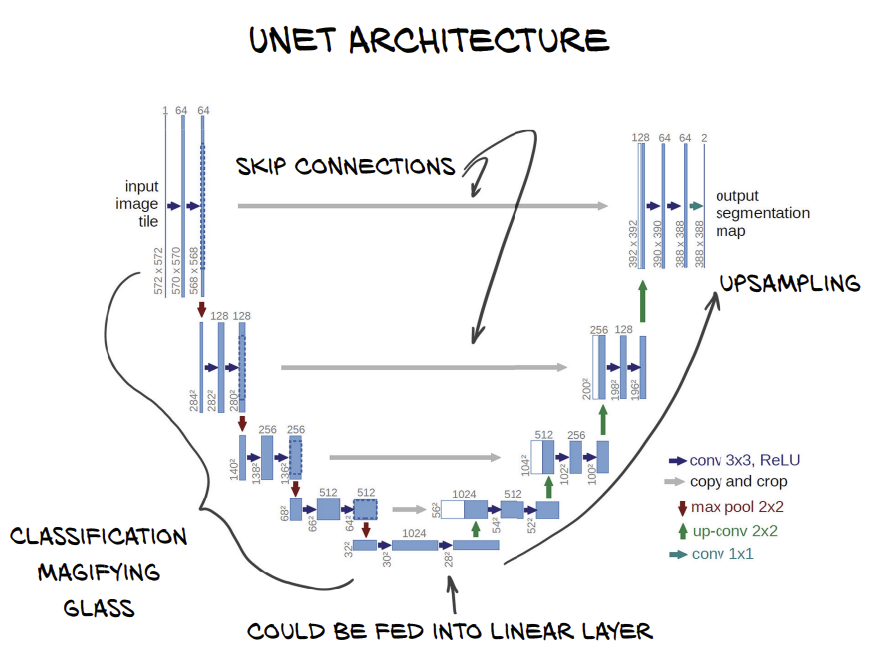

## 13.6.2. 아담 옵티마이저 사용하기

* SGD 대신 ADAM 옵티마이저(https://arxiv.org/abs/1412.6980) 사용
  * 각 파라미터별로 학습률 관리할 수 있고, 훈련 진행하면서 학습률 자동 조정
  * 스스로 적당한 학습률 빠르게 찾아내므로 별도 학습률 지정할 필요 없음
  * https://cs231n.github.io/neural-networks-3/
  * AdaMax, RAdam, Ranger 등 변형

In [ ]:
 # trainig.py:156
    def initOptimizer(self):
        return Adam(self.segmentation_model.parameters())
        # return SGD(self.segmentation_model.parameters(), lr=0.001, momentum=0.99)

## 13.6.3. 다이스 손실

**다이스 손실(Dice Loss)** 또는 **쇠렌센 다이스 계수(Sørensen-Dice coefficient)**
* https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)  
* 세그멘테이션 작업에서 일반적으로 사용하는 손실 메트릭
* 픽셀당 cross-entropy 손실 계산할 때 다이스 손실 사용하면 전체 이미지에서 작은 일부분이 양성인 경우도 처리하므로 장점

* 공식

> X, Y라는 두 집합이 주어지고 아래에서 |X|, |Y|는 각 집합의 요소 수라고 할 때,
  예측 영역과 실제 영역이 정확히 일치하면 1, 겹치는 부분 없으면 0    
  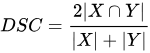


> 불리언 데이터에 대해서는, true positive (TP), false positive (FP), and false negative (FN)라 할 때,    
    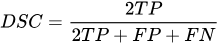



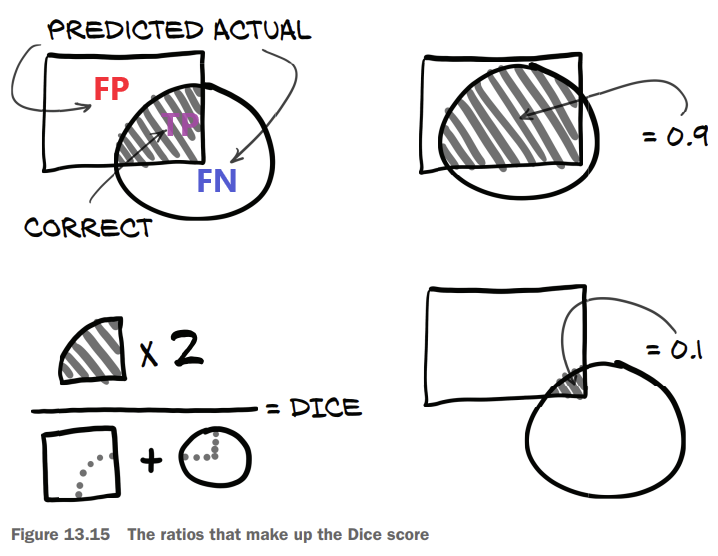

* 디이스 손실은 1에서 Dice 계수를 빼서 계산

* 소프트 다이스(soft dice)
 * 전통적인 Dice 계수의 개념을 확장하여 연속적인 값(즉, 확률)에 적용할 수 있게 만든 지표(미분 가능)
 * Dice 계수가 이진 분류 문제에 적합한 반면, Soft Dice 계수는 모델의 출력이 0과 1 사이의 확률값일 때 사용
 * 세그멘테이션과 같은 작업에서 모델이 픽셀 단위로 종양의 존재 확률을 예측할 때 유용
 * 1에서 아래 식을 빼서 계산하고, 역시 적게 중첩될 때 손실 커짐



> 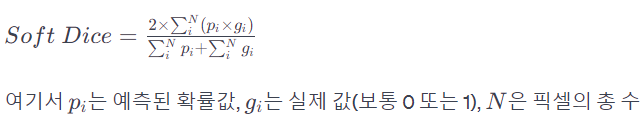



* **(비교) 자카드 유사도(Jaccard Similarity Coefficient)**    


> 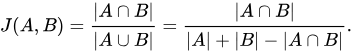    


> 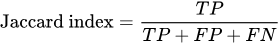

In [ ]:
# training.py:315
    def diceLoss(self, prediction_g, label_g, epsilon=1):         # diceLoss 메서드, epsilon은 분모가 0이 되는 것을 방지하기 위한 작은 상수값
        diceLabel_g = label_g.sum(dim=[1,2,3])                    # 실제 라벨의 각 배치에 대해 모든 차원을 합산하여 각각의 총 라벨 복셀 수를 계산
        dicePrediction_g = prediction_g.sum(dim=[1,2,3])          # 예측 결과의 각 배치에 대해 모든 차원을 합산하여 각각의 총 예측 복셀 수를 계산
        diceCorrect_g = (prediction_g * label_g).sum(dim=[1,2,3]) # 예측과 라벨 간의 요소별 곱(element-wise multiplication)을 수행하여 올바르게 예측된 복셀 수를 계산
                                                                  # 불리언 값이 둘 다 1(True)일 때만 1 나오므로 교집합 찾는 것과 동일

        diceRatio_g = (2 * diceCorrect_g + epsilon) \
            / (dicePrediction_g + diceLabel_g + epsilon)          # Dice Ratio 계산. 두 배의 올바르게 예측된 복셀 수를 예측 복셀 수와 실제 라벨 복셀 수의 합에 epsilon을 더한 값으로 나눔
                                                                  # 이는 2 * (예측 ∩ 라벨) / (예측 + 라벨) 공식에 해당

        return 1 - diceRatio_g                                    # 1에서 Dice Ratio를 빼서 손실 값 계산, Dice Ratio가 1에 가까우면 손실은 낮아지고, 0에 가까우면 손실은 높아짐

In [ ]:
# training.py:282
    def computeBatchLoss(self, batch_ndx, batch_tup, batch_size, metrics_g, # batch_ndx: 현재 배치의 인덱스, batch_tup: 입력 텐서, 라벨 텐서, 시리즈 리스트, 슬라이스 인덱스 리스트를 포함하는 튜플
                         classificationThreshold=0.5):                      # batch_size: 배치 크기, metrics_g: 메트릭을 저장할 텐서, classificationThreshold: 분류 임계값(기본값은 0.5)
        input_t, label_t, series_list, _slice_ndx_list = batch_tup          # 배치 튜플을 구성하는 각 요소를 분리하여 할당

        input_g = input_t.to(self.device, non_blocking=True)                # 입력과 라벨을 현재 사용 중인 디바이스(예: GPU)로 비동기적으로 전송
        label_g = label_t.to(self.device, non_blocking=True)

        if self.segmentation_model.training and self.augmentation_dict:     # 모델이 학습(훈련) 중이고 데이터 증강이 설정되어 있으면 증강을 적용(검증 때는 넘어감)
            input_g, label_g = self.augmentation_model(input_g, label_g)

        prediction_g = self.segmentation_model(input_g)                     # 세그멘테이션 모델을 실행하여 입력에 대한 예측을 수행

        diceLoss_g = self.diceLoss(prediction_g, label_g)                   # 예측과 실제 라벨 사이의 Dice 손실을 계산
        fnLoss_g = self.diceLoss(prediction_g * label_g, label_g)           # 예측된 라벨과 실제 라벨의 교집합에 대한 Dice 손실을 계산(주로 false negatives를 처리하기 위함)

# (중간 생략)

        return diceLoss_g.mean() + fnLoss_g.mean() * 8                       # Dice 손실의 평균과 fnLoss의 평균에 가중치를 더하여 반환
                                                                             # "Oops. What is this?" 가중치 8은 false negatives에 대해 더 높은 패널티를 부과하기 위함임

### 손실값 가중치

* fnLoss_g에 8 곱하여 양성 픽셀 전체 개체를 음성 픽셀 전체 개체보다 **8배** 중요하게 설정(weighted loss, diceLoss_g까지 센다면 9배)
* 양성 마스크에 해당하는 부분이 전체 64x64 크롭에 비해 작으므로 개별 양성 픽셀은 역전파 시 많은 영향력 가지게 됨
* **재현율** 높이기 위해 **false positive 높게 허용**
* 즉, 하나의 거짓 음성이 존재하는 것보다는 여러 개의 거짓 양성이 존재하는 편이 낫고, 아담 옵티마이저도 거짓 음성 손실이 우세하지 않게 제어하는 역할(SGD는 거짓 양성 많은 경향??)

### 메트릭 수집

* 재현율 높이기 위해 일부 숫자를 의도적으로 왜곡했는데, 얼마나 왜곡되었을까?

In [ ]:
        start_ndx = batch_ndx * batch_size                                      # 현재 배치의 시작 인덱스 계산[각 배치에 10개 샘플 있고 현재 3번째 배치(인덱스 2) 처리 중이라면, start_ndx는 2 * 10 = 20이 되어, 전체 데이터셋에서 21번째 샘플부터 시작]
        end_ndx = start_ndx + input_t.size(0)                                   # 끝 인덱스 계산 시작 위치에 현재 배치의 샘플 개수 더하면 마지막 샘플 다음 위치(다음 배치의 시작 위) 얻을 수

        with torch.no_grad():                                                   # 그래디언트 계산을 중지하여 메모리 사용량을 줄이고 계산 속도 높
            predictionBool_g = (prediction_g[:, 0:1]                            # 모델이 예측한 각 복 확률이 임계값 classificationThreshold 넘는지 확인하여 불리언 마스크 생성
                                > classificationThreshold).to(torch.float32)    # 이후 곱셈 연산 위해 결과는 부동소수점으로 변환

            tp = (     predictionBool_g *  label_g).sum(dim=[1,2,3])            # true positives, false negatives, false positives를 계산
            fn = ((1 - predictionBool_g) *  label_g).sum(dim=[1,2,3])
            fp = (     predictionBool_g * (~label_g)).sum(dim=[1,2,3])

            metrics_g[METRICS_LOSS_NDX, start_ndx:end_ndx] = diceLoss_g         # 계산된 메트릭을 metrics_g 텐서에 저장
            metrics_g[METRICS_TP_NDX, start_ndx:end_ndx] = tp
            metrics_g[METRICS_FN_NDX, start_ndx:end_ndx] = fn
            metrics_g[METRICS_FP_NDX, start_ndx:end_ndx] = fp

## 13.6.4. 이미지를 텐서보드에 넣기

 * TensorBoard
  * 세그멘테이션 작업 결과를 시각적으로 쉽게 평가할 수 있음

* 훈련 때 확인할 몇 가지 사항
 * 오래 기다릴 필요 없이 모델 훈련이 어떻게 진행되고 있는지 대략적으로 알아내기
 * GPU 사이클 대부분을 검증 아닌 훈련에 사용하기
 * 검증셋에서 좋은 성능 보이고 있는지 확인



In [ ]:
# training.py:210
    def main(self):
        # training.py:217
        self.validation_cadence = 5                             # 검증 주기 설정 즉, 5번 에포크마다 검증 수행
        for epoch_ndx in range(1, self.cli_args.epochs + 1):    # 전체 에포크 수만큼 반복
            # training.py:228
            trnMetrics_t = self.doTraining(epoch_ndx, train_dl) # 현재 에포크에 대한 훈련을 수행하고 훈련 메트릭을 반환
            self.logMetrics(epoch_ndx, 'trn', trnMetrics_t)     # 훈련 메트릭을 로깅, 에포크 번호와 'trn'(훈련) 태그와 함께.

            if epoch_ndx == 1 or epoch_ndx % self.validation_cadence == 0: # 첫 번째 에포크이거나 설정된 검증 주기에 해당하는 에포크일 때 검증 로깅 수행
                # training.py:239
                self.logImages(epoch_ndx, 'trn', train_dl)      # 훈련 데이터셋에 대한 이미지 로깅 수행
                self.logImages(epoch_ndx, 'val', val_dl)        # 검 데이터셋에 대한 이미지 로깅 수행

        self.trn_writer.close()                                 # 훈련과 검증에 사용된 TensorBoard writer 닫기, 리소스 해제.
        self.val_writer.close()

In [ ]:
# training.py:326
    def logImages(self, epoch_ndx, mode_str, dl):              # 모델을 평가 모드로 설정, 모델이 훈련하는 동안 사용했던 특정 동작(예: 드롭아웃) 비활성화
        self.segmentation_model.eval()

        images = sorted(dl.dataset.series_list)[:12]           # 데이터 로더(dl)의 데이터셋에서 series_list 가져와 정렬한 뒤, 처음 12개 시리즈만 사용
        for series_ndx, series_uid in enumerate(images):       # 시리즈 목록 반복하면서 각 시리즈의 UID에 대한 처리 수행
            ct = getCt(series_uid)                             # 주어진 시리즈 UID에 해당하는 CT 스캔 데이터 로드

            for slice_ndx in range(6):                                          # CT 스캔의 여러 슬라이스 반복, ,총 6개의 슬라이스 선택합
                ct_ndx = slice_ndx * (ct.hu_a.shape[0] - 1) // 5                # 슬라이스 인덱스 계산하여 CT 스캔의 전체 깊이에 걸쳐 균일하게 분포되도록
                sample_tup = dl.dataset.getitem_fullSlice(series_uid, ct_ndx)   # 데이터셋에서 전체 슬라이스 가져오는 함수 사용하여 샘플 튜플(CT 이미지, 라벨, 시리즈 UID, 슬라이스 인덱스) 반

                ct_t, label_t, series_uid, ct_ndx = sample_tup # 샘플 튜플에서 CT 이미지, 라벨, 시리즈 UID, CT 인덱스 추출하여 이후 이미지 로깅, 시각화 작업 수행

* 총 12개의 서로 다른 CT 시리즈에서 각각 6개씩의 슬라이스를 추출하여 처리
* 총 72개(12시리즈 x 6슬라이스)의 다양한 슬라이스 이미지가 텐서보드에서 시각화?

In [ ]:
# training.py:346
                ct_t[:-1,:,:] /= 2000  # CT 스캔의 모든 슬라이스를 Hounsfield 단위에서 [-0.5, 0.5] 범위로,
                ct_t[:-1,:,:] += 0.5   # [0, 1] 범위로 조정

                ctSlice_a = ct_t[dl.dataset.contextSlices_count].numpy() # 현재 컨텍스트 슬라이스를 넘파이 배열로 변환

                # 이미지 배열 생성하고 CT 슬라이스 데이터로 초기화
                image_a = np.zeros((512, 512, 3), dtype=np.float32)    # RGB 이미지를 위한 기본 배열 생성
                image_a[:,:,:] = ctSlice_a.reshape((512,512,1))        # CT 슬라이스를 RGB 채널 모두에 할당하여 그레이스케일 이미지 생성
                image_a[:,:,0] += prediction_a & (1 - label_a)         # 거짓 양성일 때 빨간색 채널에 값 추가
                image_a[:,:,0] += (1 - prediction_a) & label_a         # 거짓 음성일 때 빨간색 채널에 값 추가하고 녹색 채널에도 절반의 값 추가하여 주황색 생성
                image_a[:,:,1] += ((1 - prediction_a) & label_a) * 0.5
                image_a[:,:,1] += prediction_a & label_a               # 참 양성일 때 녹색 채널에 값 추가
                image_a *= 0.5                                         # 이미지의 밝기를 반으로 줄임
                image_a.clip(0, 1, image_a)                            # 이미지의 픽셀 값을 [0, 1] 범위로 제한

In [ ]:
# training.py:361
# 텐서보드에 이미지를 로그
                writer = getattr(self, mode_str + '_writer')           # 텐서보드 writer 객체 가져옴
                writer.add_image(
                    f'{mode_str}/{series_ndx}_prediction_{slice_ndx}', # 이미지에 태그 지정
                    image_a,                                           # 이미지 데이터
                    self.totalTrainingSamples_count,                   # 글로벌 스텝 값으로 총 훈련 샘플 수 사용
                    dataformats='HWC',                                 # 이미지 데이터 포맷을 높이(H), 너비(W), 채널(C) 순으로 설정
                )

## 13.6.5. 메트릭 로깅 업데이트

In [ ]:
# training.py:400
        sum_a = metrics_a.sum(axis=1)                                  # metrics_a 배열의 모든 값들이 유한한지 확인하고, 각 메트릭의 합을 sum_a 배열에 저장
        assert np.isfinite(metrics_a).all()

        allLabel_count = sum_a[METRICS_TP_NDX] + sum_a[METRICS_FN_NDX] # True Positive + False Negative 합산

        metrics_dict = {}                                              # 메트릭 값을 딕셔너리에 저장하여 추후 사용
        metrics_dict['loss/all'] = metrics_a[METRICS_LOSS_NDX].mean()  # 전체 손실의 평균

        # 각 메트릭을 전체 레이블 수로 나누어 백분율 계산, 만약 전체 레이블 수가 0일 경우 1로 나누어 0으로 나누는 상황 방지
        metrics_dict['percent_all/tp'] = \
            sum_a[METRICS_TP_NDX] / (allLabel_count or 1) * 100        # True Positive
        metrics_dict['percent_all/fn'] = \
            sum_a[METRICS_FN_NDX] / (allLabel_count or 1) * 100        # False Negative
        metrics_dict['percent_all/fp'] = \
            sum_a[METRICS_FP_NDX] / (allLabel_count or 1) * 100        # False Positive

In [ ]:
# training.py:393
    def logMetrics(self, epoch_ndx, mode_str, metrics_t):
         # training.py:453
        score = metrics_dict['pr/recall'] # 재현율 점수를 `metrics_dict` 딕셔너리에서 추출하여 score 변수에 저장

        return score                      # 추출한 점수 반환

In [ ]:
# training.py:210
    def main(self):
        # training.py:216
        best_score = 0.0                  # 학습 과정에서 가장 좋은 성능 점수를 저장하기 위한 변수 초기화
                # training.py:233
                valMetrics_t = self.doValidation(epoch_ndx, val_dl)     # 검증 데이터로더(val_dl)를 사용하여 현재 epoch에 대한 검증을 수행하고, 결과 메트릭스 텐서를 반환받음
                score = self.logMetrics(epoch_ndx, 'val', valMetrics_t) # 로그 메트릭스 함수 호출하여 검증 점수 계산하고 로그에 기록한 후, 반환된 점수를 score 변수에 저장
                best_score = max(score, best_score)                     # 현재 epoch의 검증 점수와 이전까지의 최고 점수를 비교하여 더 높은 값을 best_score 변수에 저장

## 13.6.6. 모델 저장

In [ ]:
# training.py:480
    def saveModel(self, type_str, epoch_ndx, isBest=False):  # 현재 모델의 인스턴스 가져옴. 만약 모델이 DataParallel로 래핑되어 있다면, 원본 모듈 추출
        # training.py:496
        model = self.segmentation_model
        if isinstance(model, torch.nn.DataParallel):
            model = model.module

        state = {                                                           # 모델 및 학습 상태에 대한 정보를 딕셔너리로 저장
            'sys_argv': sys.argv,                                           # 명령줄 인자
            'time': str(datetime.datetime.now()),                           # 현재 시각
            'model_state': model.state_dict(),                              # 모델의 상태(가중치 등)
            'model_name': type(model).__name__,                             # 모델의 클래스 이름
            'optimizer_state' : self.optimizer.state_dict(),                # 옵티마이저 상태
            'optimizer_name': type(self.optimizer).__name__,                # 옵티마이저의 클래스 이름
            'epoch': epoch_ndx,                                             # 현재 에포크 번호
            'totalTrainingSamples_count': self.totalTrainingSamples_count,  # 총 학습 샘플 수
        }
        torch.save(state, file_path)                                        # 상태 딕셔너리를 파일로 저장

        log.info("Saved model params to {}".format(file_path))              # 로그를 통해 모델이 저장되었음을 기록

In [ ]:
 # training.py:514
        if isBest:                                                          # 만약 현재 모델이 지금까지의 최고 성능을 나타내는 모델이라면
            best_path = os.path.join(                                       # 최고 성능 모델의 파라미터를 저장할 경로를 설정
                'data-unversioned', 'part2', 'models',
                self.cli_args.tb_prefix,
                f'{type_str}_{self.time_str}_{self.cli_args.comment}.best.state')
            shutil.copyfile(file_path, best_path)                           # 지금 저장한 모델의 파라미터 파일을 최고 성능 모델의 파일 경로로 복사

            log.info("Saved model params to {}".format(best_path))          # 로그에 최고 성능 모델의 파라미터가 저장되었다는 메시지를 기록

        with open(file_path, 'rb') as f:                                    # 모델 파라미터 파일을 바이너리 읽기 모드로 열기
            log.info("SHA1: " + hashlib.sha1(f.read()).hexdigest())         # 파일의 내용을 읽어 해시값(SHA1) 계산하고, 이를 로그에 기록

# 13.7 결과

In [ ]:
python -m p2ch13.training --epochs 20 --augmented final_seg

* 64x64 크롭 훈련 메트릭 출력 결과,
 * 참 양성(TP)과 F1 점수가 올라가고, 거짓 양성(FP)과 거짓 음성(FN)은 내려감 → 바람직!

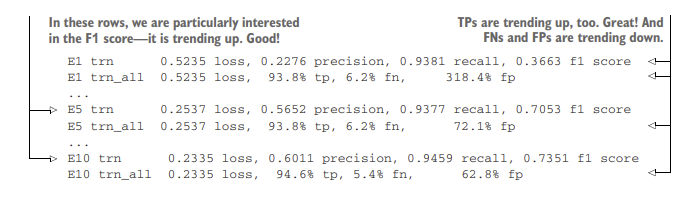

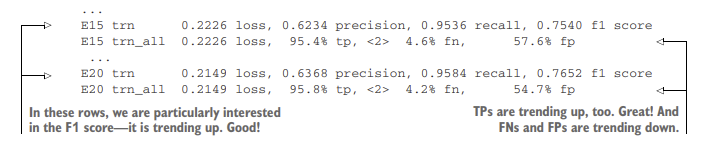

* 512x512 단면 검증 메트릭 출력 결과,
 * 거짓 양성(FP) 비율이 4,000% 초과
 * 검증용 단면 표면이 64배나 크기 때문
 * 참 양성(TP) 비율은 처음 훈련했던 64x64 샘플에 포함됭므로 변하지 않았음

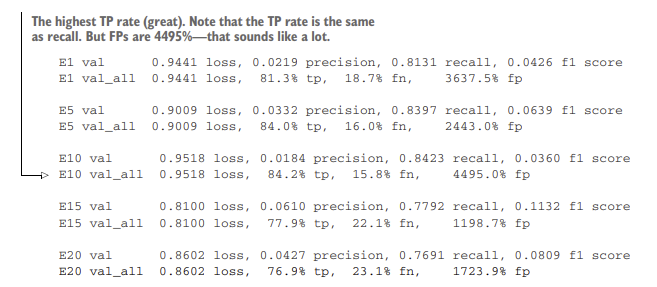

* **재현율(참 양성 비율)**
 * 에포크 5~10 사이에서 안정적이다가 이후 떨어지기 시작
 * 과적합되고 있음을 알 수 있음
 * 훈련 재현율은 올라가지만 검증 재현율은 300만 개 샘플 이후에서 떨어지는 경향
 * 세그멘테이션 단계에서는 재현율이 우선(거짓 양성 줄이는 것)
 * 정밀도에 대한 부분은 분류 모델의 다음 단계에서?

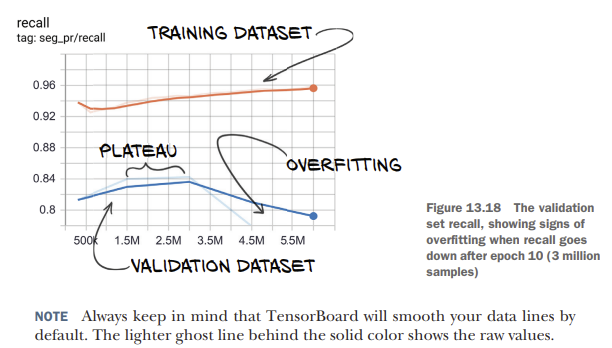

## ※ 이하는 발제자 실제 구동 결과

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/Coding/SundayAI/Deep_Learning_with_Pytorch/dlwpt-code-master/data-unversioned/part2/luna

In [ ]:
# !apt-get install p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [ ]:
# !7za x subset0.zip
# !7za x subset1.zip
# !7za x subset2.zip
# !7za x subset3.zip
# !7za x subset4.zip
# !7za x subset5.zip
# !7za x subset6.zip
# !7za x subset7.zip
# !7za x subset8.zip
# !7za x subset9.zip

In [ ]:
%cd /content/drive/MyDrive/Coding/SundayAI/Deep_Learning_with_Pytorch/dlwpt-code-master

/content/drive/MyDrive/Coding/SundayAI/Deep_Learning_with_Pytorch/dlwpt-code-master


In [ ]:
pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 31.7 MB/s eta 0:00:00


In [ ]:
pip install cassandra-driver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 65.0 MB/s eta 0:00:00


In [ ]:
## !python -m p2ch13.training_colab --epochs 20 --augmented final_seg
# !python -m p2ch13.training_colab --epochs 20 --augmented final_seg --num-workers 2

2024-01-09 11:29:47.588247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 11:29:47.588301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 11:29:47.589764: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 11:29:47.597347: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 11:29:48.621621: W tensorflow/compiler/tf2

In [ ]:
# !python -m p2ch13.training_colab --epochs 20 --augmented final_seg --num-workers 2

2024-01-09 14:17:39.519740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 14:17:39.519796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 14:17:39.521286: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 14:17:39.529610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 14:17:40.524602: W tensorflow/compiler/tf2

In [ ]:
# !python -m p2ch13.training_colab --epochs 20 --augmented final_seg --num-workers 2

2024-01-10 12:03:08.766976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-10 12:03:08.767025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-10 12:03:08.768387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-10 12:03:08.775598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 12:03:09.743459: W tensorflow/comp

In [ ]:
!python -m p2ch13.training_colab --epochs 20 --augmented final_seg

2024-01-11 11:03:30.159307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 11:03:30.159359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 11:03:30.160724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 11:03:30.168567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 11:03:31.287782: W tensorflow/comp